# Section I: Import Libraries

In [1]:
# Data Structures and Utility Libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report, roc_auc_score, f1_score, cohen_kappa_score, matthews_corrcoef, precision_recall_curve, roc_curve
import xgboost as xgb
from skopt import BayesSearchCV
import joblib
from imblearn.over_sampling import SMOTE
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Missing Value Analysis
# Install missingno if not installed: !pip install missingno
import missingno as msno  # Visualizing missing values

warnings.filterwarnings('ignore')
%matplotlib inline

# Section II: Understanding Data

In [2]:
# Load and Understand the Data

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
data_dictionary = pd.read_csv("data_dictionary.csv")

In [3]:
print("Training Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)

Training Data Shape: (69999, 172)
Test Data Shape: (30000, 171)


In [4]:
print("\nTraining Data Info:")
train_data.info(verbose=1)


Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8          

In [5]:
print("\nTest Data Info:")
test_data.info(verbose=1)


Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 171 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             f

In [6]:
print("\nTraining Data Full Description (all columns):")
display(train_data.describe(include="all"))


Training Data Full Description (all columns):


id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   69999.000000    69999.0         69297.0         69297.0   
unique           NaN        NaN             NaN             NaN   
top              NaN        NaN             NaN             NaN   
freq             NaN        NaN             NaN             NaN   
mean    34999.000000      109.0             0.0             0.0   
std     20207.115084        0.0             0.0             0.0   
min         0.000000      109.0             0.0             0.0   
25%     17499.500000      109.0             0.0             0.0   
50%     34999.000000      109.0             0.0             0.0   
75%     52498.500000      109.0             0.0             0.0   
max     69998.000000      109.0             0.0             0.0   

        loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
count          69297.0                69999                69600   
unique             NaN                    1                    1   
top                NaN            6/30/2014            7/31/2014   
freq               NaN                69999                69600   
mean               0.0                  NaN                  NaN   
std                0.0                  NaN                  NaN   
min                0.0                  NaN                  NaN   
25%                0.0                  NaN                  NaN   
50%                0.0                  NaN                  NaN   
75%                0.0                  NaN                  NaN   
max                0.0                  NaN                  NaN   

       last_date_of_month_8        arpu_6        arpu_7  ...   sachet_3g_7  \
count                 69266  69999.000000  69999.000000  ...  69999.000000   
unique                    1           NaN           NaN  ...           NaN   
top               8/31/2014           NaN           NaN  ...           NaN   
freq                  69266           NaN           NaN  ...           NaN   
mean                    NaN    283.134365    278.185912  ...      0.081444   
std                     NaN    334.213918    344.366927  ...      0.634547   
min                     NaN  -2258.709000  -1289.715000  ...      0.000000   
25%                     NaN     93.581000     86.714000  ...      0.000000   
50%                     NaN    197.484000    191.588000  ...      0.000000   
75%                     NaN    370.791000    365.369500  ...      0.000000   
max                     NaN  27731.088000  35145.834000  ...     33.000000   

         sachet_3g_8     fb_user_6     fb_user_7     fb_user_8           aon  \
count   69999.000000  17568.000000  17865.000000  18417.000000  69999.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        0.085487      0.916325      0.909544      0.890319   1220.639709   
std         0.680035      0.276907      0.286842      0.312501    952.426321   
min         0.000000      0.000000      0.000000      0.000000    180.000000   
25%         0.000000      1.000000      1.000000      1.000000    468.000000   
50%         0.000000      1.000000      1.000000      1.000000    868.000000   
75%         0.000000      1.000000      1.000000      1.000000   1813.000000   
max        41.000000      1.000000      1.000000      1.000000   4337.000000   

          aug_vbc_3g    jul_vbc_3g   jun_vbc_3g  churn_probability  
count   69999.000000  69999.000000  69999.00000       69999.000000  
unique           NaN           NaN          NaN                NaN  
top              NaN           NaN          NaN                NaN  
freq             NaN           NaN          NaN                NaN  
mean       68.108597     65.935830     60.07674           0.101887  
std       269.328659    267.899034    257.22681           0.302502  
min         0.0

In [7]:
print("\nTest Data Full Description (all columns):")
display(test_data.describe(include="all"))


Test Data Full Description (all columns):


id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   30000.000000    30000.0         29684.0         29684.0   
unique           NaN        NaN             NaN             NaN   
top              NaN        NaN             NaN             NaN   
freq             NaN        NaN             NaN             NaN   
mean    84998.500000      109.0             0.0             0.0   
std      8660.398374        0.0             0.0             0.0   
min     69999.000000      109.0             0.0             0.0   
25%     77498.750000      109.0             0.0             0.0   
50%     84998.500000      109.0             0.0             0.0   
75%     92498.250000      109.0             0.0             0.0   
max     99998.000000      109.0             0.0             0.0   

        loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
count          29684.0                30000                29798   
unique             NaN                    1                    1   
top                NaN            6/30/2014            7/31/2014   
freq               NaN                30000                29798   
mean               0.0                  NaN                  NaN   
std                0.0                  NaN                  NaN   
min                0.0                  NaN                  NaN   
25%                0.0                  NaN                  NaN   
50%                0.0                  NaN                  NaN   
75%                0.0                  NaN                  NaN   
max                0.0                  NaN                  NaN   

       last_date_of_month_8        arpu_6        arpu_7  ...   sachet_3g_6  \
count                 29633  30000.000000  30000.000000  ...  30000.000000   
unique                    1           NaN           NaN  ...           NaN   
top               8/31/2014           NaN           NaN  ...           NaN   
freq                  29633           NaN           NaN  ...           NaN   
mean                    NaN    282.644348    279.355021  ...      0.073467   
std                     NaN    314.560212    323.205370  ...      0.557327   
min                     NaN   -185.043000  -2014.045000  ...      0.000000   
25%                     NaN     92.907500     87.504750  ...      0.000000   
50%                     NaN    198.227500    191.775000  ...      0.000000   
75%                     NaN    371.969250    365.250750  ...      0.000000   
max                     NaN  10955.066000  13224.119000  ...     28.000000   

         sachet_3g_7   sachet_3g_8    fb_user_6    fb_user_7    fb_user_8  \
count   30000.000000  30000.000000  7585.000000  7706.000000  7922.000000   
unique           NaN           NaN          NaN          NaN          NaN   
top              NaN           NaN          NaN          NaN          NaN   
freq             NaN           NaN          NaN          NaN          NaN   
mean        0.077967      0.082200     0.909954     0.906956     0.891946   
std         0.613596      0.611546     0.286267     0.290513     0.310468   
min         0.000000      0.000000     0.000000     0.000000     0.000000   
25%         0.000000      0.000000     1.000000     1.000000     1.000000   
50%         0.000000      0.000000     1.000000     1.000000     1.000000   
75%         0.000000      0.000000     1.000000     1.000000     1.000000   
max        35.000000     30.000000     1.000000     1.000000     1.000000   

                 aon    aug_vbc_3g    jul_vbc_3g    jun_vbc_3g  
count   30000.000000  30000.000000  30000.000000  30000.000000  
unique           NaN           NaN           NaN           NaN  
top              NaN           NaN           NaN           NaN  
freq             NaN           NaN           NaN           NaN  
mean     1218.023200     68.314097     68.946576     59.891621  
std       960.109844    263.460641    278.749349    246.098292  
min       180.000000      0.000000      0.000000      0.000000  
25%       466.

In [8]:
print("\nTraining Data Numerical Description:")
display(train_data.describe())


Training Data Numerical Description:


id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0     93.581000     86.714000     84.095000      7.410000   
50%               0.0    197.484000    191.588000    192.234000     34.110000   
75%               0.0    370.791000    365.369500    369.909000    119.390000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7  ...   sachet_3g_7   sachet_3g_8     fb_user_6  \
count  67312.000000  ...  69999.000000  69999.000000  17568.000000   
mean     133.894438  ...      0.081444      0.085487      0.916325   
std      311.277193  ...      0.634547      0.680035      0.276907   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        6.675000  ...      0.000000      0.000000      1.000000   
50%       32.280000  ...      0.000000      0.000000      1.000000   
75%      115.837500  ...      0.000000      0.000000      1.000000   
max     8157.780000  ...     33.000000     41.000000      1.000000   

          fb_user_7     fb_user_8           aon    aug_vbc_3g    jul_vbc_3g  \
count  17865.000000  18417.000000  69999.000000  69999.000000  69999.000000   
mean       0.909544      0.890319   1220.639709     68.108597     65.935830   
std        0.286842      0.312501    952.426321    269.328659    267.899034   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    468.000000      0.000000      0.000000   
50%        1.000000      1.000000    868.000000      0.000000      0.000000   
75%        1.000000      1.000000   1813.000000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

        jun_vbc_3g  churn_probability  
count  69999.00000       69999.000000  
mean      60.07674           0.101887  
std      257.22681           0.302502  
min        0.00000           0.000000  
25%        0.00000           0.000000  
50%        0.00000           0.000000  
75%        0.00000           0.000000  
max    11166.21000           1.000000  

[8 rows x 163 columns]

In [9]:
print("\nTest Data Numerical Description:")
display(test_data.describe())


Test Data Numerical Description:


id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  30000.000000    30000.0         29684.0         29684.0   
mean   84998.500000      109.0             0.0             0.0   
std     8660.398374        0.0             0.0             0.0   
min    69999.000000      109.0             0.0             0.0   
25%    77498.750000      109.0             0.0             0.0   
50%    84998.500000      109.0             0.0             0.0   
75%    92498.250000      109.0             0.0             0.0   
max    99998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         29684.0  30000.000000  30000.000000  30000.000000  28831.000000   
mean              0.0    282.644348    279.355021    279.845167    130.629693   
std               0.0    314.560212    323.205370    326.437029    290.677420   
min               0.0   -185.043000  -2014.045000   -146.859000      0.000000   
25%               0.0     92.907500     87.504750     84.180500      7.280000   
50%               0.0    198.227500    191.775000    191.690500     34.760000   
75%               0.0    371.969250    365.250750    367.804750    117.170000   
max               0.0  10955.066000  13224.119000  13505.996000   6944.360000   

        onnet_mou_7  ...   sachet_3g_6   sachet_3g_7   sachet_3g_8  \
count  28828.000000  ...  30000.000000  30000.000000  30000.000000   
mean     133.148632  ...      0.073467      0.077967      0.082200   
std      302.921820  ...      0.557327      0.613596      0.611546   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        6.660000  ...      0.000000      0.000000      0.000000   
50%       32.550000  ...      0.000000      0.000000      0.000000   
75%      115.210000  ...      0.000000      0.000000      0.000000   
max     7411.010000  ...     28.000000     35.000000     30.000000   

         fb_user_6    fb_user_7    fb_user_8           aon    aug_vbc_3g  \
count  7585.000000  7706.000000  7922.000000  30000.000000  30000.000000   
mean      0.909954     0.906956     0.891946   1218.023200     68.314097   
std       0.286267     0.290513     0.310468    960.109844    263.460641   
min       0.000000     0.000000     0.000000    180.000000      0.000000   
25%       1.000000     1.000000     1.000000    466.000000      0.000000   
50%       1.000000     1.000000     1.000000    853.000000      0.000000   
75%       1.000000     1.000000     1.000000   1795.000000      0.000000   
max       1.000000     1.000000     1.000000   4197.000000   6054.390000   

         jul_vbc_3g    jun_vbc_3g  
count  30000.000000  30000.000000  
mean      68.946576     59.891621  
std      278.749349    246.098292  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max     7994.840000   6614.530000  

[8 rows x 162 columns]

In [10]:
print("\nTraining Data Overview:")
display(train_data.head())


Training Data Overview:


id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7  ...  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  \
0   87.009  ...            0            0        NaN        NaN        NaN   
1  122.787  ...            0            0        NaN        1.0        NaN   
2  103.176  ...            0            0        NaN        NaN        NaN   
3  205.260  ...            0            0        NaN        NaN        NaN   
4  128.191  ...            1            0        1.0        1.0        1.0   

    aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  
0  1958         0.0         0.0         0.0                  0  
1   710         0.0         0.0         0.0                  0  
2   882         0.0         0.0         0.0                  0  
3   982         0.0         0.0         0.0                  0  
4   647         0.0         0.0         0.0                  0  

[5 rows x 172 columns]

In [11]:
print("\nTest Data Overview:")
display(test_data.head())


Test Data Overview:


id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   

    arpu_7  ...  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  \
0   65.330  ...            0            0            0        NaN        NaN   
1  515.568  ...            0            0            0        NaN        NaN   
2  434.884  ...            0            0            0        NaN        NaN   
3  171.390  ...            0            0            0        NaN        NaN   
4  406.289  ...            0            0            0        NaN        NaN   

   fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  
0        NaN  1692        0.00        0.00        0.00  
1        NaN  2533        0.00        0.00        0.00  
2        NaN   277      525.61      758.41      241.84  
3        NaN  1244        0.00        0.00        0.00  
4        NaN   462        0.00        0.00        0.00  

[5 rows x 171 columns]

In [12]:
print("\nTraining Data Overview:")
display(train_data.tail())


Training Data Overview:


id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
69994  69994        109             0.0             0.0             0.0   
69995  69995        109             0.0             0.0             0.0   
69996  69996        109             0.0             0.0             0.0   
69997  69997        109             0.0             0.0             0.0   
69998  69998        109             0.0             0.0             0.0   

      last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
69994            6/30/2014            7/31/2014            8/31/2014   15.760   
69995            6/30/2014            7/31/2014            8/31/2014  160.083   
69996            6/30/2014            7/31/2014            8/31/2014  372.088   
69997            6/30/2014            7/31/2014            8/31/2014  238.575   
69998            6/30/2014            7/31/2014            8/31/2014  168.269   

        arpu_7  ...  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  \
69994  410.924  ...            1            0        NaN        1.0   
69995  289.129  ...            0            0        NaN        NaN   
69996  258.374  ...            0            0        NaN        NaN   
69997  245.414  ...            0            0        1.0        1.0   
69998   42.815  ...            0            0        1.0        NaN   

       fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  
69994        1.0   221        0.00        0.00        0.00                  0  
69995        NaN   712        0.00        0.00        0.00                  0  
69996        NaN   879        0.00        0.00        0.00                  0  
69997        1.0   277      664.25     1402.96      990.97                  0  
69998        1.0  1876        0.00        0.00        0.00                  0  

[5 rows x 172 columns]

In [13]:
print("\nTest Data Overview:")
display(test_data.tail())


Test Data Overview:


id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
29995  99994        109             0.0             0.0             0.0   
29996  99995        109             0.0             0.0             0.0   
29997  99996        109             0.0             0.0             0.0   
29998  99997        109             0.0             0.0             0.0   
29999  99998        109             0.0             0.0             0.0   

      last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
29995            6/30/2014            7/31/2014            8/31/2014   
29996            6/30/2014            7/31/2014            8/31/2014   
29997            6/30/2014            7/31/2014            8/31/2014   
29998            6/30/2014            7/31/2014            8/31/2014   
29999            6/30/2014            7/31/2014            8/31/2014   

         arpu_6   arpu_7  ...  sachet_3g_6  sachet_3g_7  sachet_3g_8  \
29995   718.870  396.259  ...            0            0            0   
29996   218.327  324.070  ...            0            0            0   
29997   139.473   38.230  ...            0            0            0   
29998  1122.912  781.121  ...            0            0            0   
29999   318.980  307.890  ...            1            1            0   

       fb_user_6  fb_user_7  fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  \
29995        1.0        NaN        NaN  1255        3.71      105.64   
29996        NaN        0.0        NaN  2258        0.00        0.00   
29997        NaN        NaN        NaN   440        0.00        0.00   
29998        NaN        NaN        NaN   810        0.00        0.00   
29999        1.0        1.0        1.0   440      762.55      687.13   

       jun_vbc_3g  
29995       61.48  
29996        0.00  
29997        0.00  
29998        0.00  
29999       22.76  

[5 rows x 171 columns]

In [14]:
print("Train Data DTypes:")
print(train_data.dtypes)

Train Data DTypes:
id                     int64
circle_id              int64
loc_og_t2o_mou       float64
std_og_t2o_mou       float64
loc_ic_t2o_mou       float64
                      ...   
aon                    int64
aug_vbc_3g           float64
jul_vbc_3g           float64
jun_vbc_3g           float64
churn_probability      int64
Length: 172, dtype: object


In [15]:
print("\nTest Data DTypes:")
print(test_data.dtypes)


Test Data DTypes:
id                  int64
circle_id           int64
loc_og_t2o_mou    float64
std_og_t2o_mou    float64
loc_ic_t2o_mou    float64
                   ...   
fb_user_8         float64
aon                 int64
aug_vbc_3g        float64
jul_vbc_3g        float64
jun_vbc_3g        float64
Length: 171, dtype: object


In [16]:
print("\nMissing Values in Training Data:")
print(train_data.isnull().sum())


Missing Values in Training Data:
id                     0
circle_id              0
loc_og_t2o_mou       702
std_og_t2o_mou       702
loc_ic_t2o_mou       702
                    ... 
aon                    0
aug_vbc_3g             0
jul_vbc_3g             0
jun_vbc_3g             0
churn_probability      0
Length: 172, dtype: int64


In [17]:
print("\nMissing Values in Test Data:")
print(test_data.isnull().sum())


Missing Values in Test Data:
id                    0
circle_id             0
loc_og_t2o_mou      316
std_og_t2o_mou      316
loc_ic_t2o_mou      316
                  ...  
fb_user_8         22078
aon                   0
aug_vbc_3g            0
jul_vbc_3g            0
jun_vbc_3g            0
Length: 171, dtype: int64


In [18]:
categorical_features = train_data.select_dtypes(include=['object']).columns
print("\nUnique Values in Categorical Features (Training Data):")
for feature in categorical_features:
    print(f"{feature}: {train_data[feature].nunique()} unique values")


Unique Values in Categorical Features (Training Data):
last_date_of_month_6: 1 unique values
last_date_of_month_7: 1 unique values
last_date_of_month_8: 1 unique values
date_of_last_rech_6: 30 unique values
date_of_last_rech_7: 31 unique values
date_of_last_rech_8: 31 unique values
date_of_last_rech_data_6: 30 unique values
date_of_last_rech_data_7: 31 unique values
date_of_last_rech_data_8: 31 unique values


In [19]:
print("\nUnique Values in Categorical Features (Test Data):")
for feature in categorical_features:
    print(f"{feature}: {test_data[feature].nunique()} unique values")


Unique Values in Categorical Features (Test Data):
last_date_of_month_6: 1 unique values
last_date_of_month_7: 1 unique values
last_date_of_month_8: 1 unique values
date_of_last_rech_6: 30 unique values
date_of_last_rech_7: 31 unique values
date_of_last_rech_8: 31 unique values
date_of_last_rech_data_6: 30 unique values
date_of_last_rech_data_7: 31 unique values
date_of_last_rech_data_8: 31 unique values


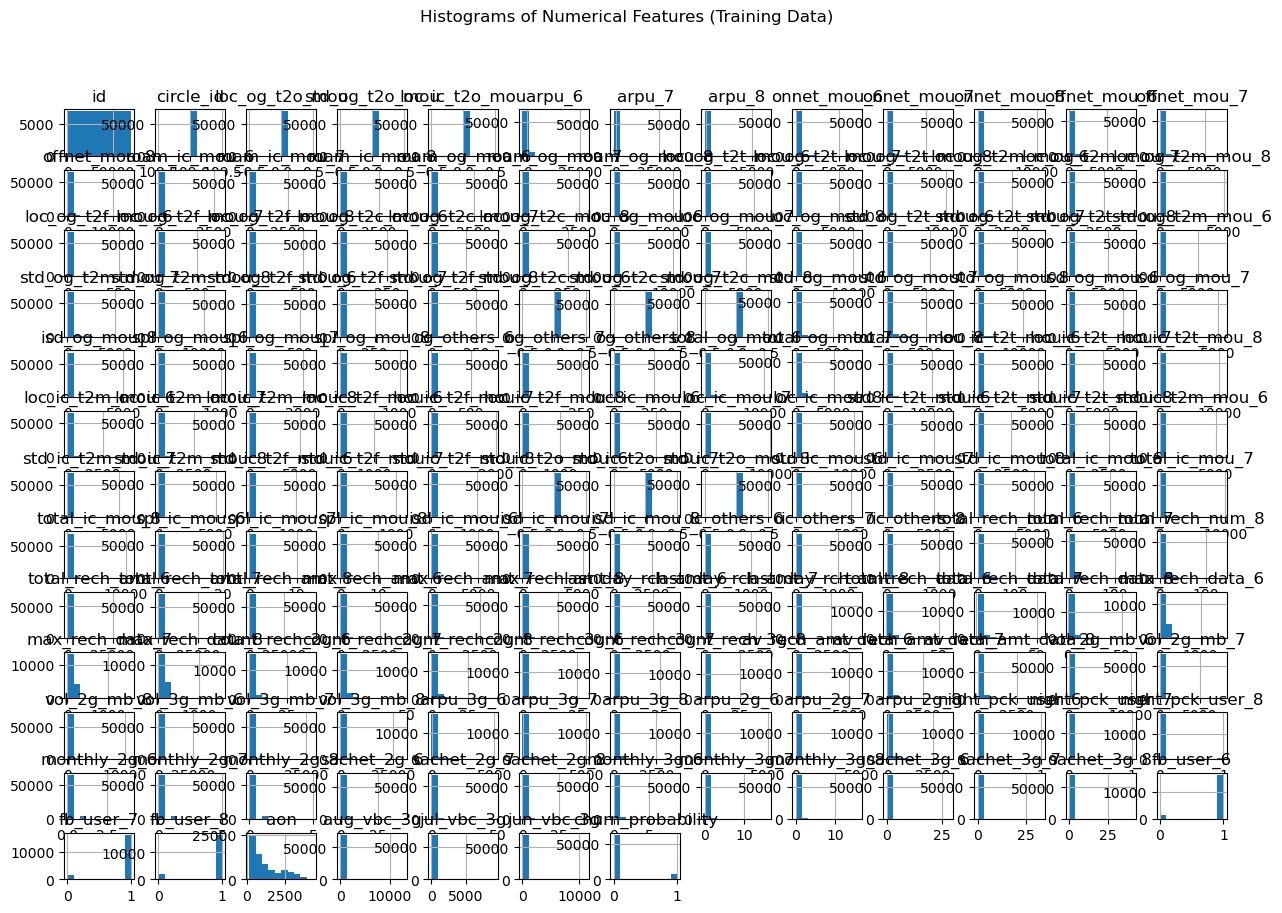

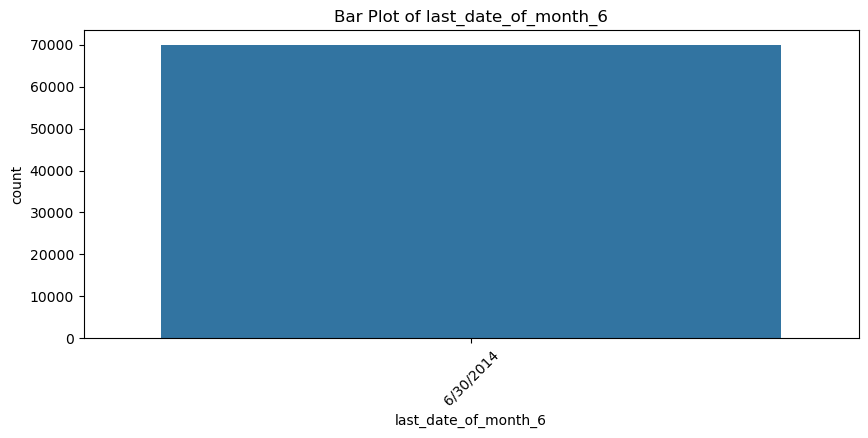

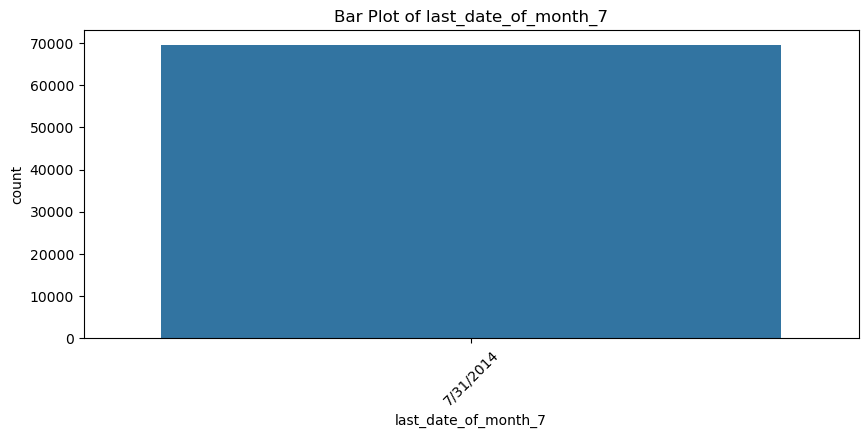

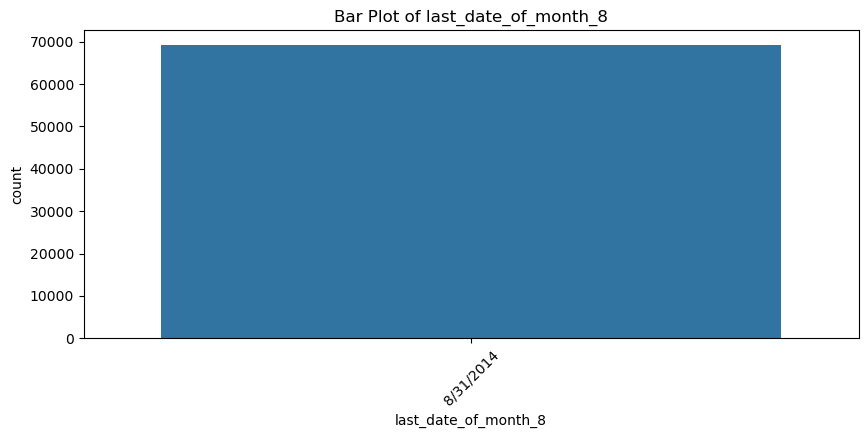

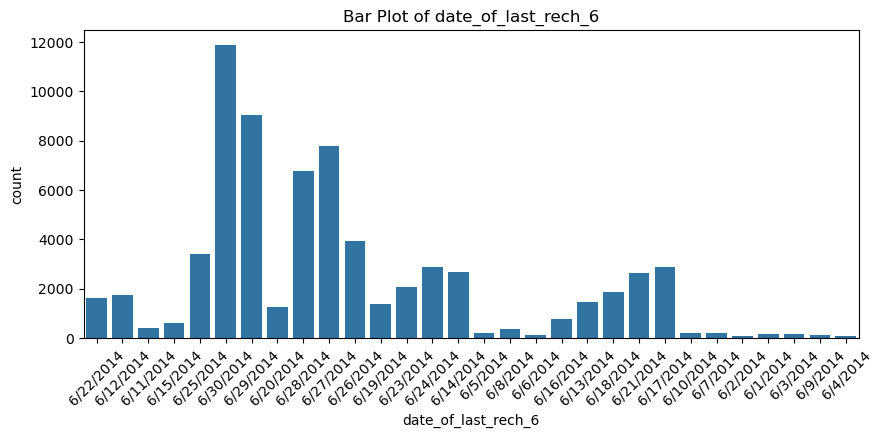

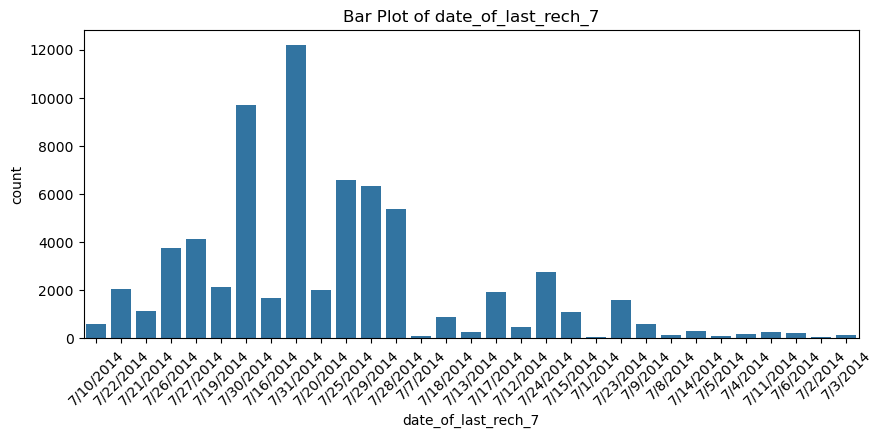

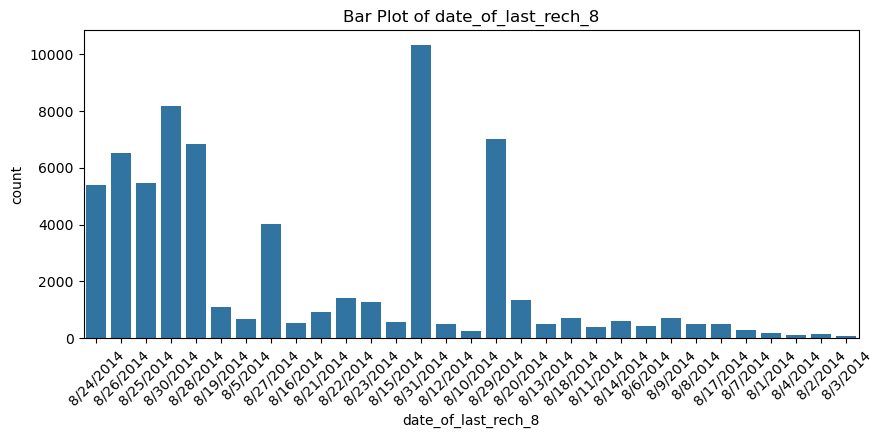

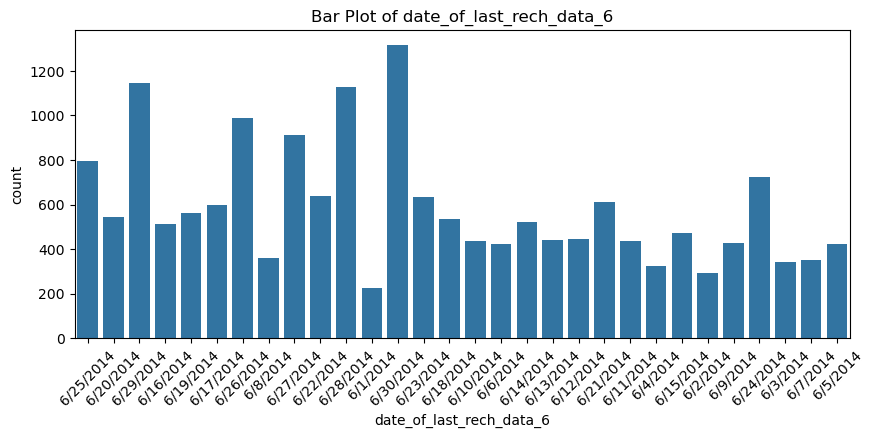

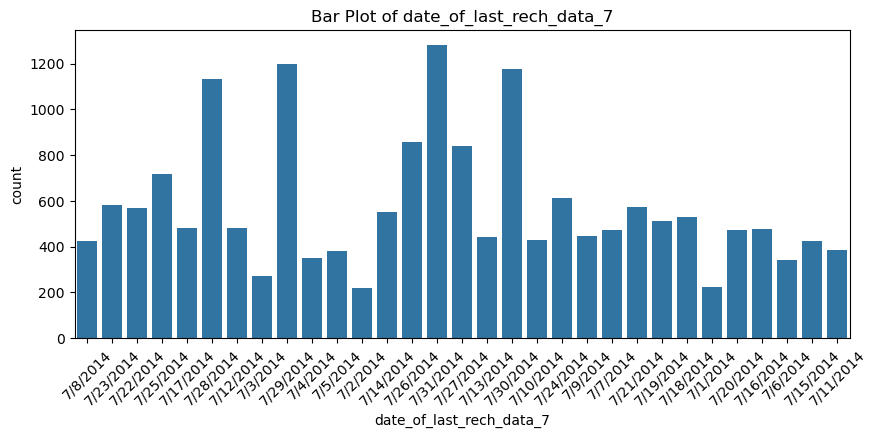

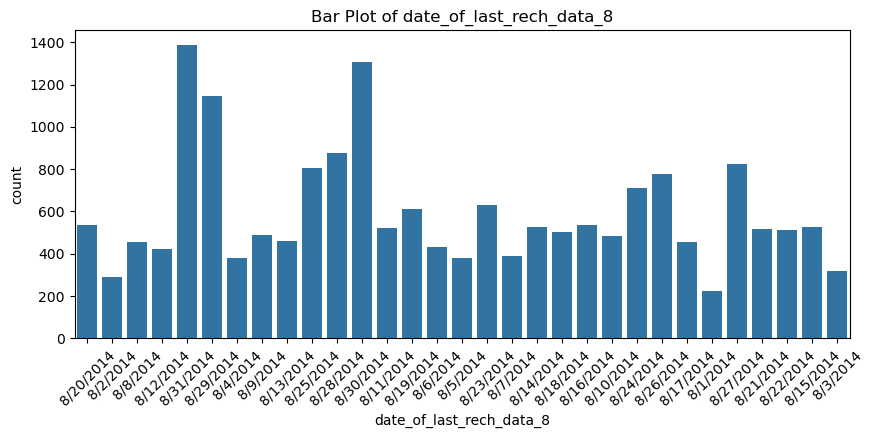

In [20]:
train_data.hist(figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features (Training Data)')
plt.show()

for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=train_data, x=feature)
    plt.title(f'Bar Plot of {feature}')
    plt.xticks(rotation=45)
    plt.show()

# Section III: Data Pre-processing

In [21]:
print("\nMissing Values in Training Dataset:\n")
missing_values_train = train_data.isnull().sum().sort_values(ascending=False)
print(missing_values_train[missing_values_train > 0])


Missing Values in Training Dataset:

arpu_3g_6                   52431
count_rech_2g_6             52431
night_pck_user_6            52431
arpu_2g_6                   52431
date_of_last_rech_data_6    52431
                            ...  
last_date_of_month_8          733
loc_ic_t2o_mou                702
std_og_t2o_mou                702
loc_og_t2o_mou                702
last_date_of_month_7          399
Length: 125, dtype: int64


In [22]:
print("\nMissing Values in Testing Dataset:\n")
missing_values_test = test_data.isnull().sum().sort_values(ascending=False)
print(missing_values_test[missing_values_test > 0])


Missing Values in Testing Dataset:

arpu_3g_6               22415
count_rech_3g_6         22415
fb_user_6               22415
night_pck_user_6        22415
total_rech_data_6       22415
                        ...  
last_date_of_month_8      367
loc_og_t2o_mou            316
std_og_t2o_mou            316
loc_ic_t2o_mou            316
last_date_of_month_7      202
Length: 125, dtype: int64



Visualizing Missing Values in Training Data:


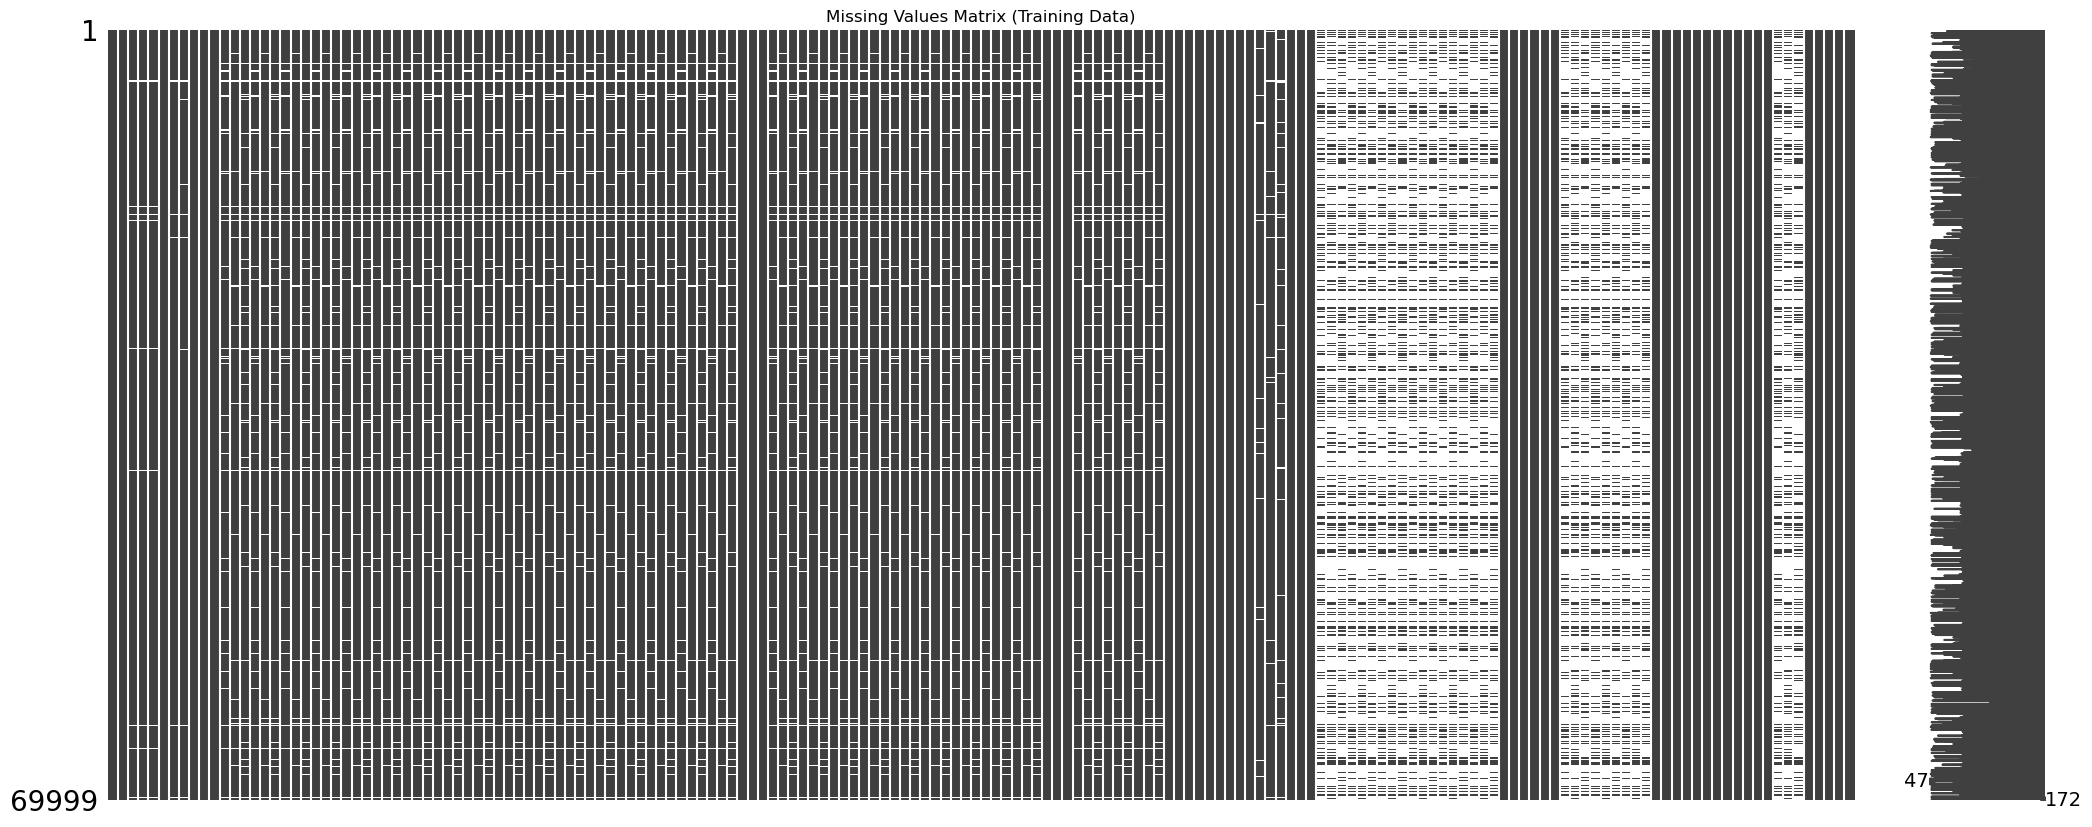

In [23]:
print("\nVisualizing Missing Values in Training Data:")
msno.matrix(train_data)
plt.title('Missing Values Matrix (Training Data)')
plt.show()


Visualizing Missing Values in Test Data:


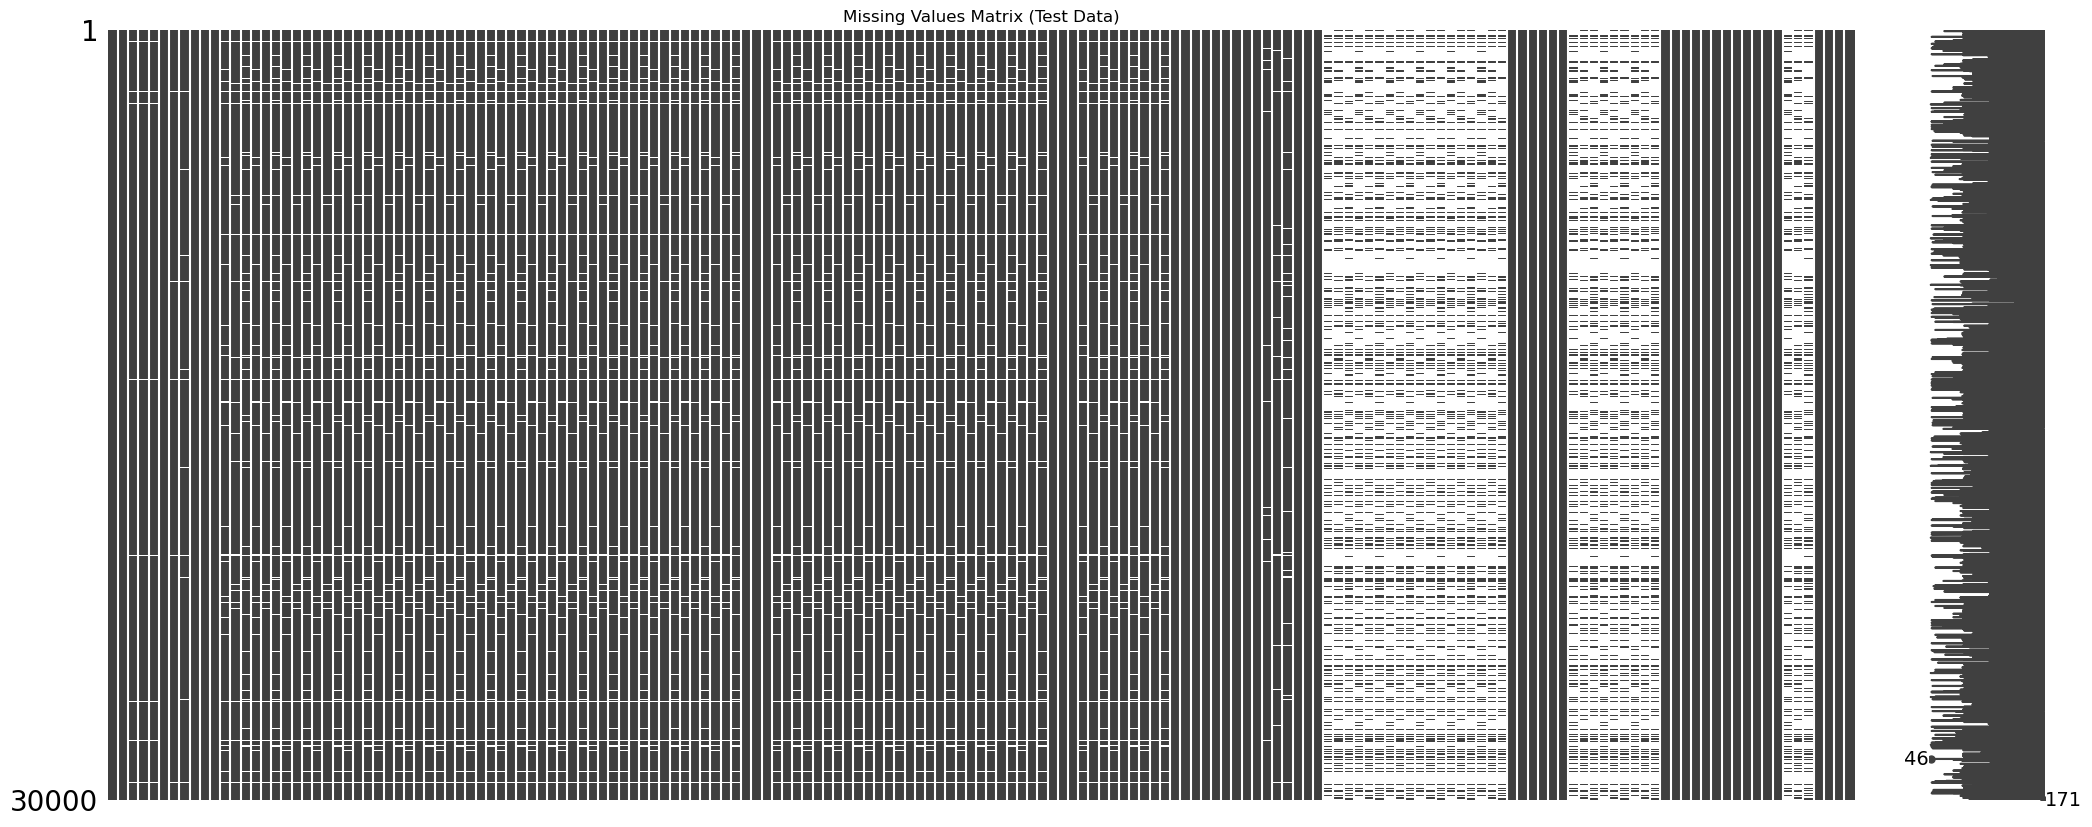

In [24]:
print("\nVisualizing Missing Values in Test Data:")
msno.matrix(test_data)
plt.title('Missing Values Matrix (Test Data)')
plt.show()

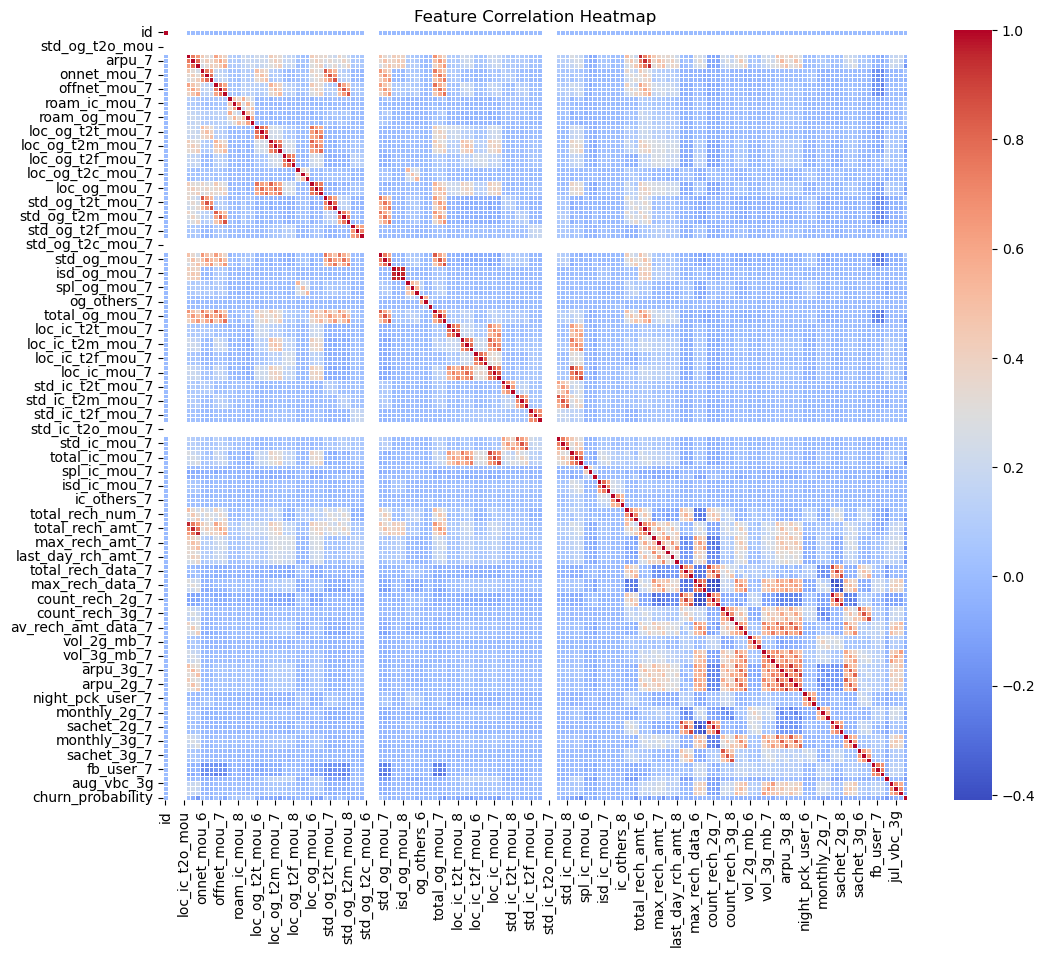

In [25]:
numeric_columns = train_data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 10))
sns.heatmap(train_data[numeric_columns].corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

In [26]:
missing_percentage_train = train_data.isnull().mean() * 100
columns_to_drop_train = missing_percentage_train[missing_percentage_train > 40].index
train_data.drop(columns=columns_to_drop_train, inplace=True)
test_data.drop(columns=columns_to_drop_train, inplace=True)

In [27]:
# Select numerical columns excluding 'churn_probability' from training data
numerical_cols_train = train_data.select_dtypes(include=['float64', 'int64']).drop(columns=['churn_probability'], errors='ignore').columns
categorical_cols_train = train_data.select_dtypes(include=['object']).columns

# Impute missing values for numerical columns
num_imputer = SimpleImputer(strategy='mean')
train_data[numerical_cols_train] = num_imputer.fit_transform(train_data[numerical_cols_train])
test_data[numerical_cols_train] = num_imputer.transform(test_data[numerical_cols_train])

# Impute missing values for categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
train_data[categorical_cols_train] = cat_imputer.fit_transform(train_data[categorical_cols_train])
test_data[categorical_cols_train] = cat_imputer.transform(test_data[categorical_cols_train])

# Check for infinite values in numerical columns only
print("\nChecking for Infinite Values in Training Data:")
print(np.isinf(train_data[numerical_cols_train]).sum())

print("\nChecking for Infinite Values in Test Data:")
print(np.isinf(test_data[numerical_cols_train]).sum())



Checking for Infinite Values in Training Data:
id                0
circle_id         0
loc_og_t2o_mou    0
std_og_t2o_mou    0
loc_ic_t2o_mou    0
                 ..
sachet_3g_8       0
aon               0
aug_vbc_3g        0
jul_vbc_3g        0
jun_vbc_3g        0
Length: 135, dtype: int64

Checking for Infinite Values in Test Data:
id                0
circle_id         0
loc_og_t2o_mou    0
std_og_t2o_mou    0
loc_ic_t2o_mou    0
                 ..
sachet_3g_8       0
aon               0
aug_vbc_3g        0
jul_vbc_3g        0
jun_vbc_3g        0
Length: 135, dtype: int64


# Section IV: Exploratory Data Analysis (EDA)

<Figure size 1600x1200 with 0 Axes>

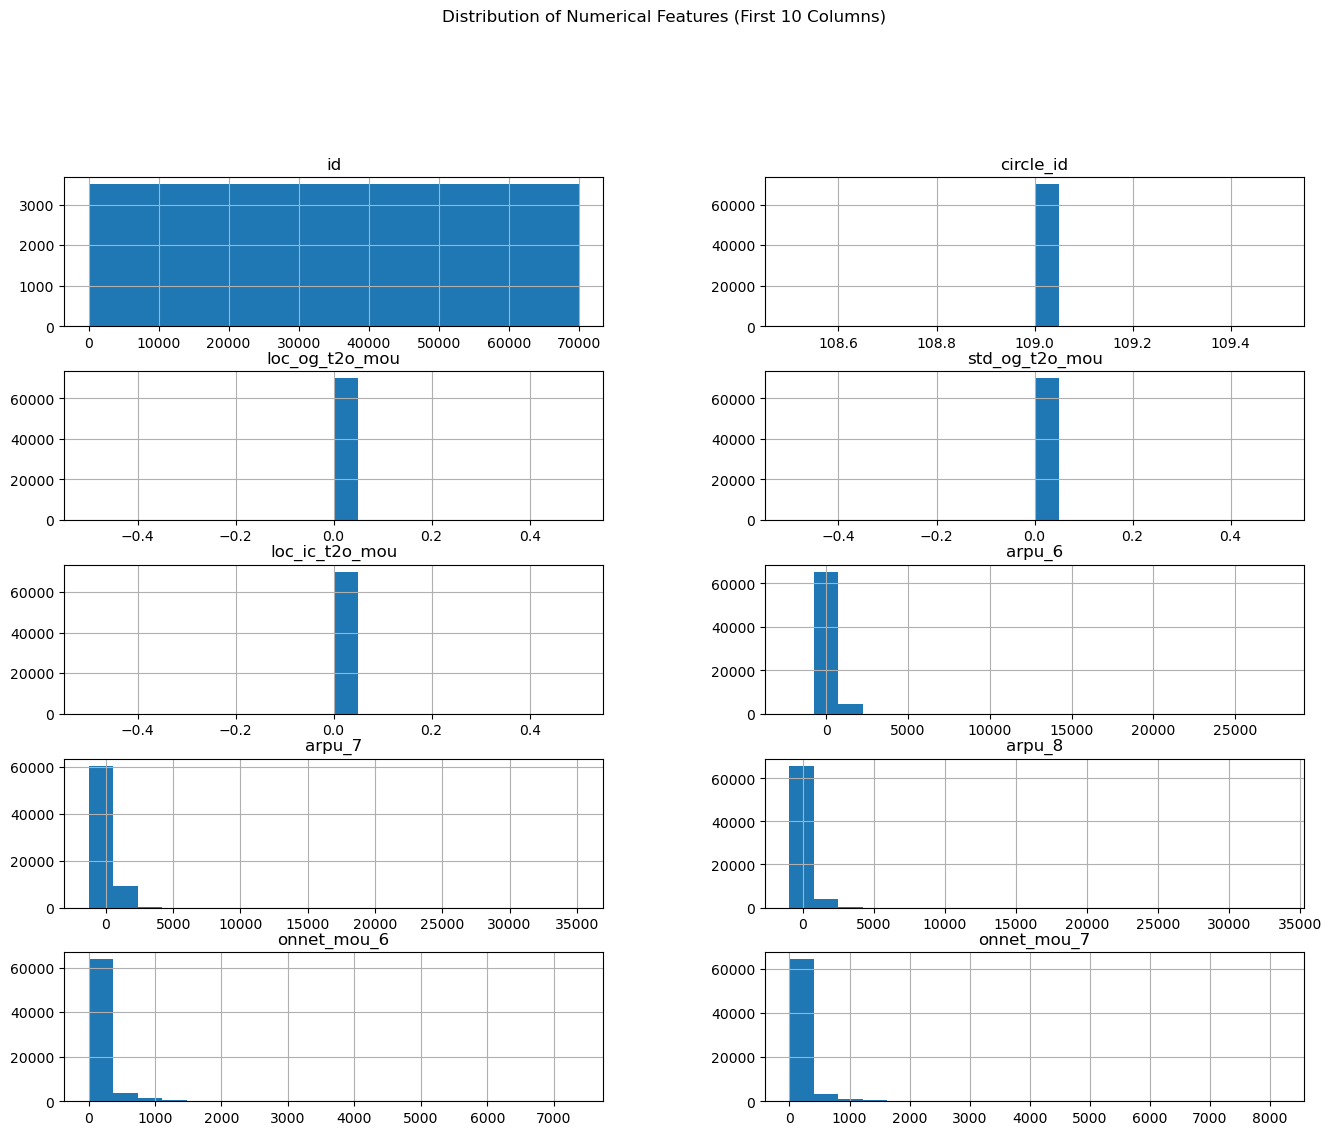

In [28]:
plt.figure(figsize=(16, 12))
train_data[numerical_cols_train[:10]].hist(bins=20, figsize=(16, 12), layout=(5, 2))
plt.suptitle('Distribution of Numerical Features (First 10 Columns)', y=1.02)
plt.show()

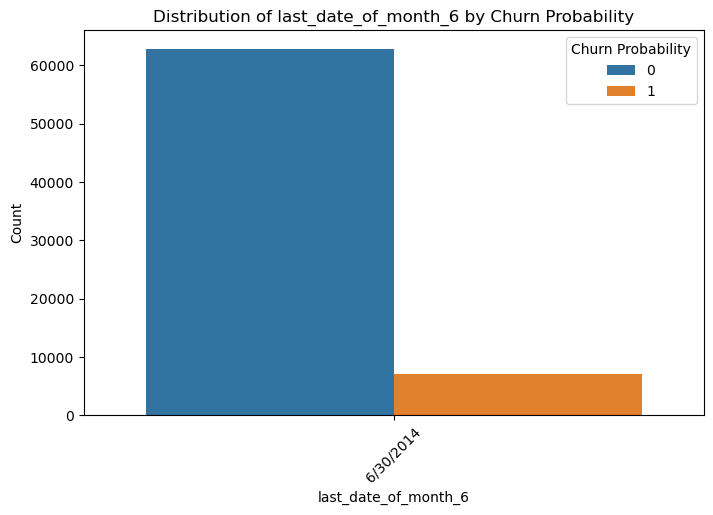

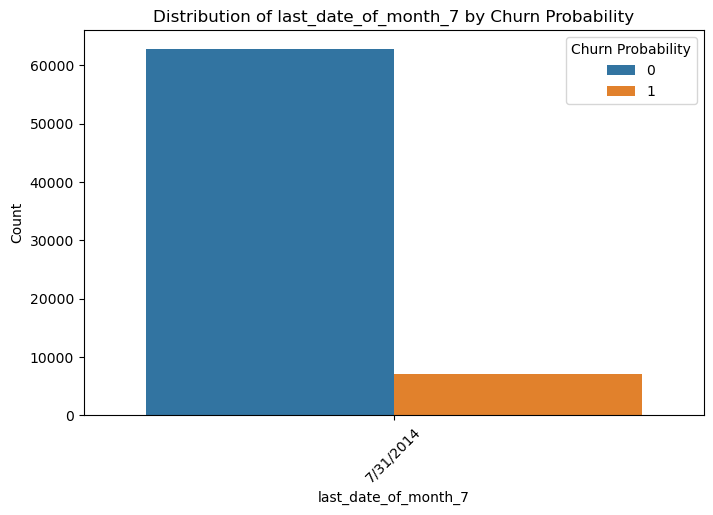

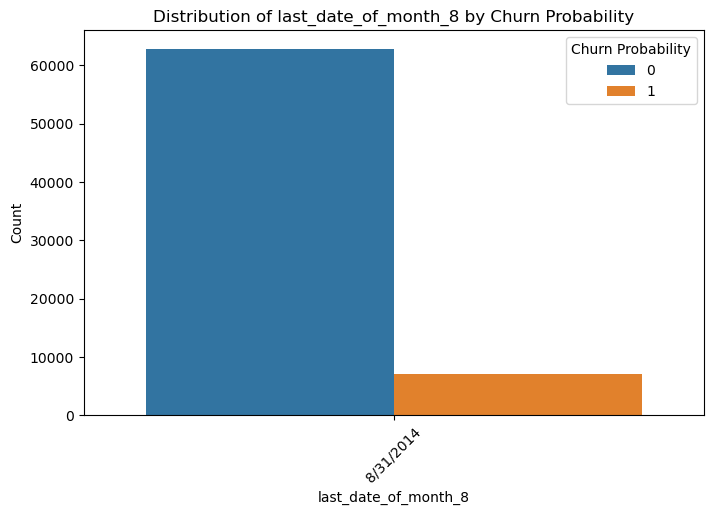

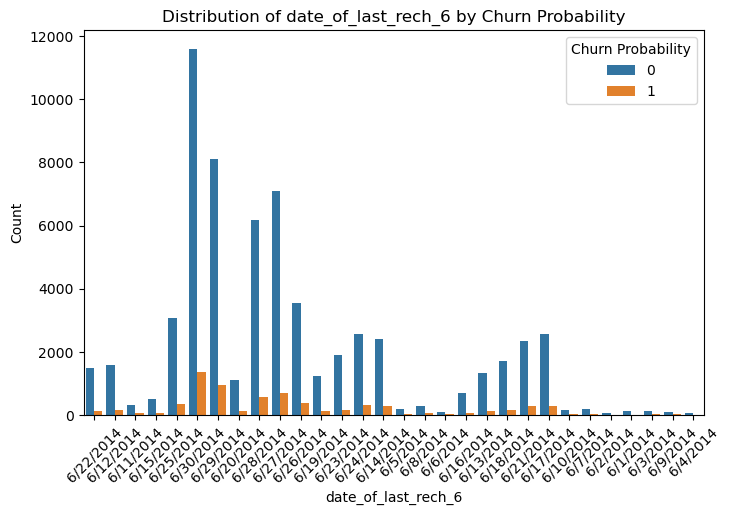

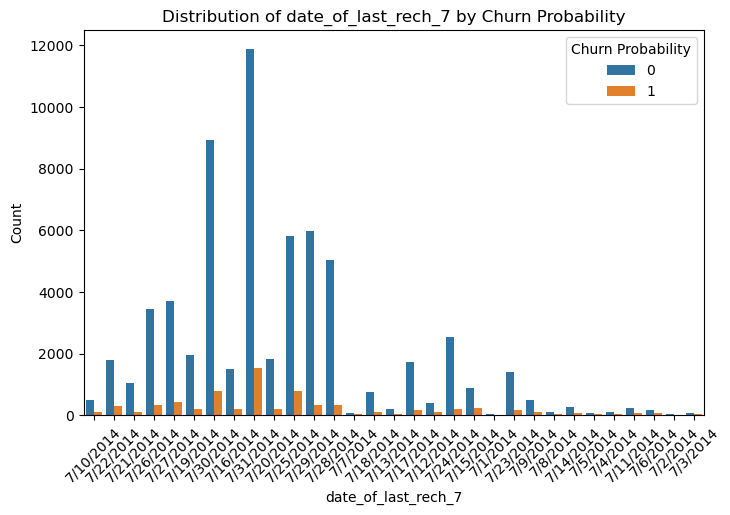

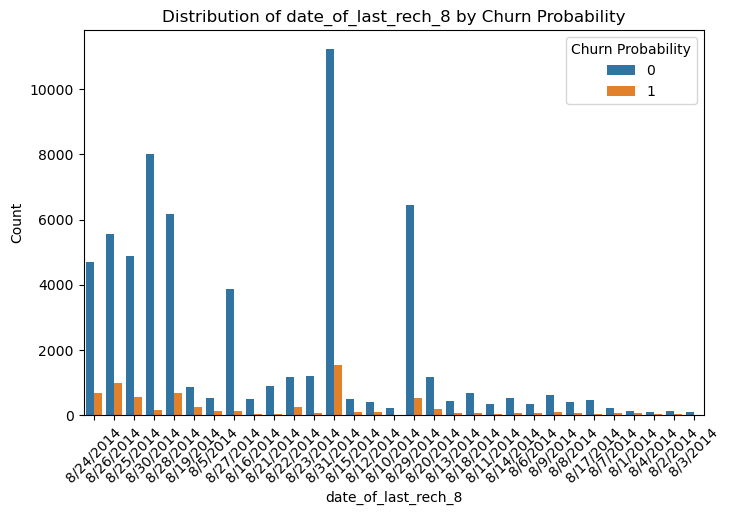

In [29]:
categorical_columns = train_data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=column, data=train_data, hue='churn_probability')
    plt.title(f'Distribution of {column} by Churn Probability')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Churn Probability')
    plt.xticks(rotation=45)
    plt.show()

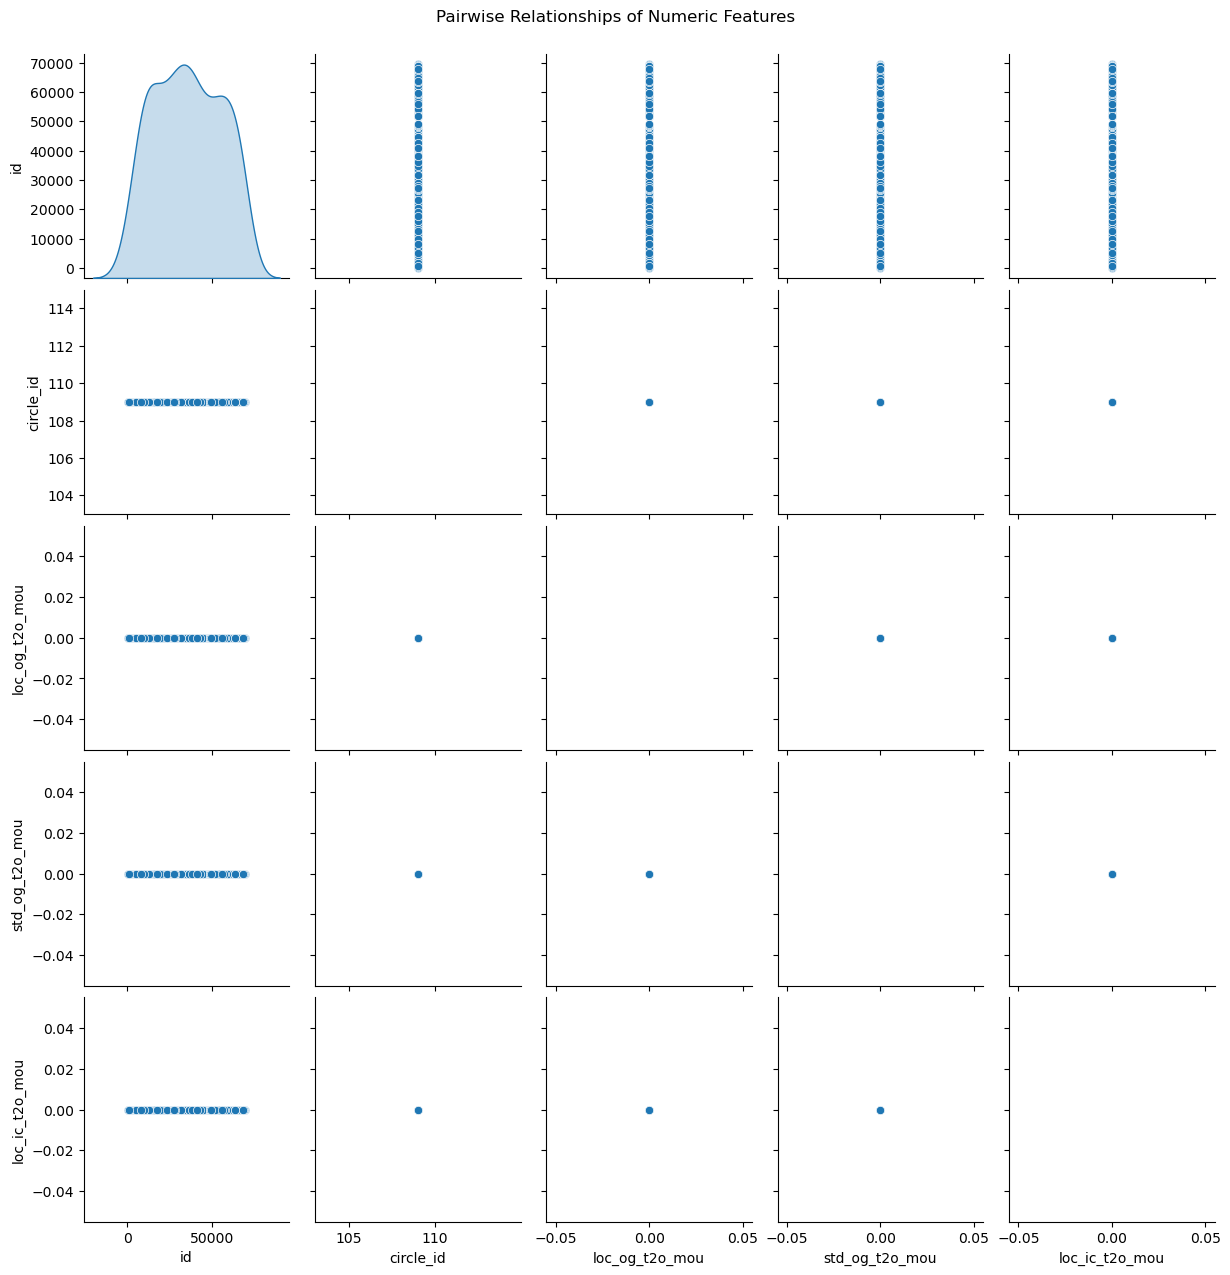

In [30]:
selected_pairplot_columns = numeric_columns[:5]
if len(selected_pairplot_columns) > 0:
    sns.pairplot(train_data[selected_pairplot_columns].dropna().sample(min(200, len(train_data))), diag_kind='kde')
    plt.suptitle('Pairwise Relationships of Numeric Features', y=1.02)
    plt.show()

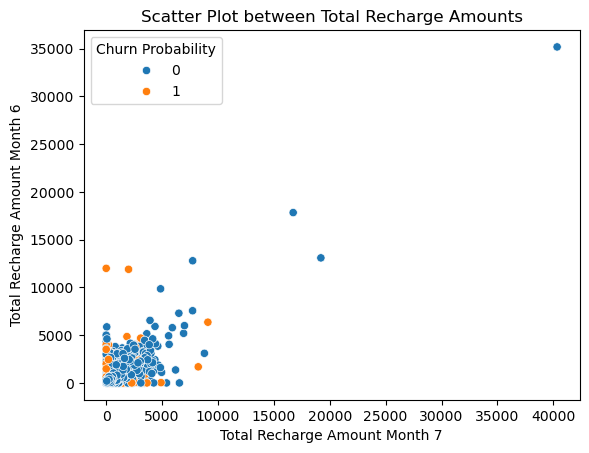

In [31]:
# Replace 'feature1' and 'feature2' with actual column names
sns.scatterplot(x='total_rech_amt_7', y='total_rech_amt_6', hue='churn_probability', data=train_data)

plt.title('Scatter Plot between Total Recharge Amounts')
plt.xlabel('Total Recharge Amount Month 7')
plt.ylabel('Total Recharge Amount Month 6')
plt.legend(title='Churn Probability')
plt.show()

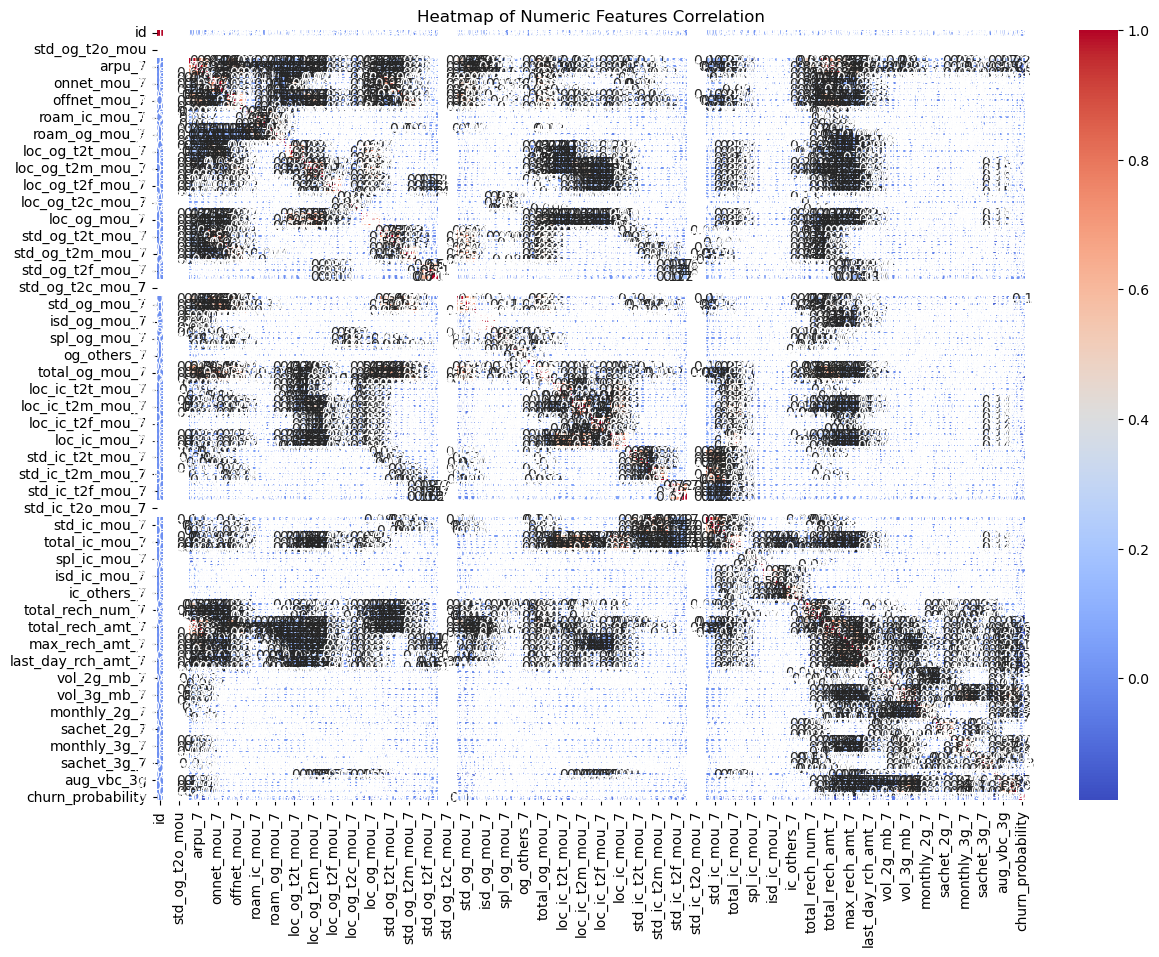

In [32]:
# Exclude non-numeric columns
numeric_cols_train = train_data.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_cols_train.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Numeric Features Correlation')
plt.show()

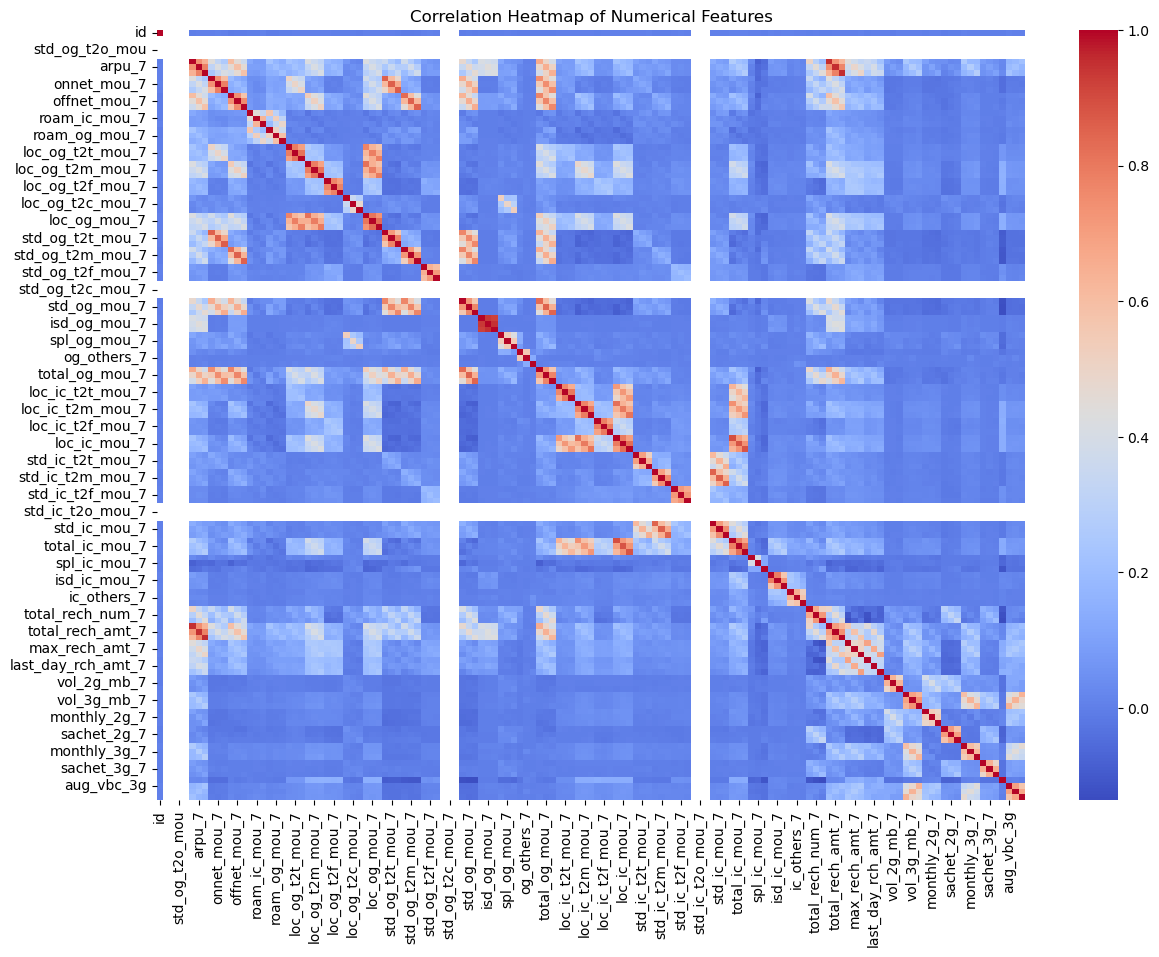

In [33]:
plt.figure(figsize=(14, 10))
sns.heatmap(train_data[numerical_cols_train].corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [34]:
# Exclude non-numeric columns
numeric_cols_train = train_data.select_dtypes(include=[np.number])

# Compute the correlation matrix and get correlations with target variable
correlations_with_target = numeric_cols_train.corr()['churn_probability'].sort_values(ascending=False)

# Display the correlations
print("Correlations with Target Variable:\n", correlations_with_target)

# Drop features with low correlation
low_corr_features = correlations_with_target[correlations_with_target.abs() < 0.05].index
train_data = train_data.drop(columns=[col for col in low_corr_features if col != 'id'])
test_data = test_data.drop(columns=[col for col in low_corr_features if col in test_data.columns and col != 'id'])

Correlations with Target Variable:
 churn_probability    1.000000
std_og_mou_6         0.101261
std_og_t2t_mou_6     0.079157
roam_og_mou_7        0.077893
roam_og_mou_8        0.077275
                       ...   
std_og_t2c_mou_7          NaN
std_og_t2c_mou_8          NaN
std_ic_t2o_mou_6          NaN
std_ic_t2o_mou_7          NaN
std_ic_t2o_mou_8          NaN
Name: churn_probability, Length: 136, dtype: float64


# Section V: Feature Engineering and Feature Selection

In [35]:
# Ensure all necessary columns are available before applying transformations
required_columns = train_data.columns

# Create new features from existing data, such as extracting date components
if 'last_date_of_month_6' in required_columns:
    train_data['year'] = pd.to_datetime(train_data['last_date_of_month_6']).dt.year
    train_data['month'] = pd.to_datetime(train_data['last_date_of_month_6']).dt.month
    train_data['day'] = pd.to_datetime(train_data['last_date_of_month_6']).dt.day
    test_data['year'] = pd.to_datetime(test_data['last_date_of_month_6']).dt.year
    test_data['month'] = pd.to_datetime(test_data['last_date_of_month_6']).dt.month
    test_data['day'] = pd.to_datetime(test_data['last_date_of_month_6']).dt.day

# Interaction features for recharge amounts
if 'total_rech_amt_6' in required_columns and 'total_rech_amt_7' in required_columns:
    train_data['total_rech_amt_diff_6_7'] = train_data['total_rech_amt_7'] - train_data['total_rech_amt_6']
    test_data['total_rech_amt_diff_6_7'] = test_data['total_rech_amt_7'] - test_data['total_rech_amt_6']

# Rolling averages for recharge amounts
if all(col in required_columns for col in ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']):
    train_data['rolling_avg_rech_amt'] = train_data[['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']].mean(axis=1)
    test_data['rolling_avg_rech_amt'] = test_data[['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']].mean(axis=1)

# Tenure features
if 'aon' in required_columns:
    train_data['tenure_years'] = train_data['aon'] / 365
    test_data['tenure_years'] = test_data['aon'] / 365

# Usage patterns for data volume
if all(col in required_columns for col in ['vol_2g_mb_6', 'vol_3g_mb_6']):
    train_data['total_data_vol_6'] = train_data['vol_2g_mb_6'] + train_data['vol_3g_mb_6']
    test_data['total_data_vol_6'] = test_data['vol_2g_mb_6'] + test_data['vol_3g_mb_6']

# Recency and frequency features for recharge
if 'last_day_rch_amt_6' in required_columns:
    train_data['is_recent_recharger'] = train_data['last_day_rch_amt_6'].apply(lambda x: 1 if x > 0 else 0)
    test_data['is_recent_recharger'] = test_data['last_day_rch_amt_6'].apply(lambda x: 1 if x > 0 else 0)

# High usage indicator for incoming calls
if 'total_ic_mou_6' in required_columns:
    high_ic_threshold = train_data['total_ic_mou_6'].quantile(0.75)
    train_data['is_high_ic_user'] = train_data['total_ic_mou_6'] > high_ic_threshold
    test_data['is_high_ic_user'] = test_data['total_ic_mou_6'] > high_ic_threshold

# Drop original columns to avoid redundancy
columns_to_drop = [
    'last_date_of_month_6', 'aon', 
    'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
    'vol_2g_mb_6', 'vol_3g_mb_6', 'last_day_rch_amt_6'
]

train_data.drop(columns=[col for col in columns_to_drop if col in train_data.columns], inplace=True)
test_data.drop(columns=[col for col in columns_to_drop if col in test_data.columns], inplace=True)

# Print the dataset shape after feature engineering
print("Training Data Shape after Feature Engineering:", train_data.shape)
print("Test Data Shape after Feature Engineering:", test_data.shape)

Training Data Shape after Feature Engineering: (69999, 62)
Test Data Shape after Feature Engineering: (30000, 61)


In [37]:
# Separate target variable early
X_train = train_data.drop('churn_probability', axis=1)
y_train = train_data['churn_probability']

In [38]:
# Step 1: Impute Missing Values

# Separate target variable early
X_train = train_data.drop('churn_probability', axis=1)
y_train = train_data['churn_probability']

# Split categorical and numerical columns
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Impute missing values for numerical columns
num_imputer = SimpleImputer(strategy='mean')
X_numerical_imputed = num_imputer.fit_transform(X_train[numerical_columns])
X_numerical_imputed_df = pd.DataFrame(X_numerical_imputed, columns=numerical_columns, index=X_train.index)

# Check if there are categorical columns before imputing
if len(categorical_columns) > 0:
    # Impute missing values for categorical columns
    cat_imputer = SimpleImputer(strategy='most_frequent')
    X_categorical_imputed = cat_imputer.fit_transform(X_train[categorical_columns])
    X_categorical_imputed_df = pd.DataFrame(X_categorical_imputed, columns=categorical_columns, index=X_train.index)
else:
    print("No categorical columns found for imputation.")
    X_categorical_imputed_df = pd.DataFrame(index=X_train.index)  # Empty DataFrame if no categorical columns are found

# Concatenate the numerical and categorical imputed DataFrames
X_imputed = pd.concat([X_numerical_imputed_df, X_categorical_imputed_df], axis=1)

# Ensure there are no missing values left in the training data
print("Missing values after imputation:", X_imputed.isnull().sum().sum())

# Confirm new shape
print(f"New shape of X_train: {X_imputed.shape}")


Missing values after imputation: 0
New shape of X_train: (69999, 57)


# Section VI: Handle Imbalanced Data

In [39]:
# Confirm no missing values
print(f"Missing values in X_train before SMOTE: {X_train.isnull().sum().sum()}")

Missing values in X_train before SMOTE: 0


In [40]:
# Separate target variable early
X_train = train_data.drop('churn_probability', axis=1)
y_train = train_data['churn_probability']

# Confirm no missing values
print(f"Missing values in X_train before SMOTE: {X_train.isnull().sum().sum()}")

# Step 1: Impute Missing Values

# Split categorical and numerical columns
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = X_train.select_dtypes(include=['object']).columns
date_columns = X_train.select_dtypes(include=['datetime', 'object']).apply(pd.to_datetime, errors='coerce').dropna(axis=1).columns

# Handle date columns by converting to numeric values (if they are necessary)
for col in date_columns:
    X_train[f'{col}_year'] = pd.to_datetime(X_train[col], errors='coerce').dt.year
    X_train[f'{col}_month'] = pd.to_datetime(X_train[col], errors='coerce').dt.month
    X_train[f'{col}_day'] = pd.to_datetime(X_train[col], errors='coerce').dt.day

# Drop original date columns
X_train.drop(columns=date_columns, inplace=True)

# Re-split categorical and numerical columns after handling date columns
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Impute missing values for numerical columns
num_imputer = SimpleImputer(strategy='mean')
X_numerical_imputed = num_imputer.fit_transform(X_train[numerical_columns])
X_numerical_imputed_df = pd.DataFrame(X_numerical_imputed, columns=numerical_columns, index=X_train.index)

# Impute missing values for categorical columns, if any
if len(categorical_columns) > 0:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    X_categorical_imputed = cat_imputer.fit_transform(X_train[categorical_columns])
    X_categorical_imputed_df = pd.DataFrame(X_categorical_imputed, columns=categorical_columns, index=X_train.index)
else:
    # If no categorical columns, create an empty DataFrame
    X_categorical_imputed_df = pd.DataFrame(index=X_train.index)

# Concatenate the numerical and categorical imputed DataFrames
X_imputed = pd.concat([X_numerical_imputed_df, X_categorical_imputed_df], axis=1)

# Debugging check
print("Shape of X_imputed after imputation:", X_imputed.shape)

# Step 2: Apply One-Hot Encoding Before SMOTE, if categorical columns exist
if len(categorical_columns) > 0:
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    X_encoded = pd.DataFrame(encoder.fit_transform(X_imputed[categorical_columns]),
                             columns=encoder.get_feature_names_out(categorical_columns),
                             index=X_imputed.index)

    # Drop original categorical columns and concatenate encoded features
    X_imputed.drop(columns=categorical_columns, inplace=True)
    X_imputed = pd.concat([X_imputed, X_encoded], axis=1)

# Debugging check
print("Shape of X_imputed after encoding:", X_imputed.shape)

# Step 3: Apply SMOTE to Handle Class Imbalance
# SMOTE can only handle numeric features, ensure all features are numeric
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_imputed, y_train)

# Debugging check
print("Shape of X_resampled after SMOTE:", X_resampled.shape)

# Step 4: Feature Selection using Recursive Feature Elimination (RFE)
model = RandomForestClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=20)
rfe.fit(X_resampled, y_resampled)

# Correct selection of features
selected_features = X_resampled.columns[rfe.support_]
X_selected = X_resampled.loc[:, selected_features]

print("Feature selection completed. Selected features shape:", X_selected.shape)

# Step 5: Model Training and Prediction

# Split the selected features into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_selected, y_resampled, test_size=0.3, random_state=42)

# Debugging check
print("Shape of X_train after split:", X_train.shape)

# Train a RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Validate the model
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.4f}')

# Generate predictions for the test set (handling the test set similarly)

# Impute missing values for the test set
test_data_numerical_imputed = num_imputer.transform(test_data[numerical_columns])
test_data_numerical_imputed_df = pd.DataFrame(test_data_numerical_imputed, columns=numerical_columns, index=test_data.index)

# Impute missing values for categorical columns in test set, if they exist
if len(categorical_columns) > 0:
    test_data_categorical_imputed = cat_imputer.transform(test_data[categorical_columns])
    test_data_categorical_imputed_df = pd.DataFrame(test_data_categorical_imputed, columns=categorical_columns, index=test_data.index)
else:
    test_data_categorical_imputed_df = pd.DataFrame(index=test_data.index)

# Concatenate imputed numerical and categorical DataFrames
X_test_imputed = pd.concat([test_data_numerical_imputed_df, test_data_categorical_imputed_df], axis=1)

# Apply one-hot encoding on categorical columns of test data, if they exist
if len(categorical_columns) > 0:
    encoded_features_test = pd.DataFrame(encoder.transform(X_test_imputed[categorical_columns]),
                                         columns=encoder.get_feature_names_out(categorical_columns),
                                         index=X_test_imputed.index)

    X_test_imputed.drop(columns=categorical_columns, inplace=True)
    X_test_imputed = pd.concat([X_test_imputed.reset_index(drop=True), encoded_features_test.reset_index(drop=True)], axis=1)

# Feature selection on test data using the same RFE
X_test_selected = rfe.transform(X_test_imputed)

# Generate predictions for the test set
test_data['churn_probability'] = model.predict(X_test_selected)

# Display the first few rows of the test set with predictions
print(test_data[['id', 'churn_probability']].head())


Missing values in X_train before SMOTE: 0
Shape of X_imputed after imputation: (69999, 52)
Shape of X_imputed after encoding: (69999, 52)
Shape of X_resampled after SMOTE: (125734, 52)
Feature selection completed. Selected features shape: (125734, 20)
Shape of X_train after split: (88013, 20)
Validation Accuracy: 0.9452
        id  churn_probability
0  69999.0                  0
1  70000.0                  0
2  70001.0                  0
3  70002.0                  0
4  70003.0                  0


# Section VII: Data Leakage Prevention Using Pipeline

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the pipeline that only contains the model
pipeline = Pipeline(steps=[
    ('model', RandomForestClassifier(random_state=42))
])

# Split the preprocessed data into training and validation sets
X_train_full, X_val_full, y_train_full, y_val_full = train_test_split(X_selected, y_resampled, test_size=0.3, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(X_train_full, y_train_full)

# Make predictions on the validation set
y_val_pred = pipeline.predict(X_val_full)

# Evaluate the model accuracy
print("Pipeline Model Accuracy: {:.4f}".format(accuracy_score(y_val_full, y_val_pred)))

Pipeline Model Accuracy: 0.9452


# Section VIII: Model Selection, Building, and Evaluation Using Pipeline



Tuning hyperparameters for Logistic Regression...
Best parameters for Logistic Regression: OrderedDict({'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'})
Best cross-validation accuracy for Logistic Regression: 0.8390

Tuning hyperparameters for Random Forest...
Best parameters for Random Forest: OrderedDict({'max_depth': 15, 'n_estimators': 200})
Best cross-validation accuracy for Random Forest: 0.9369

Tuning hyperparameters for XGBoost...
Best parameters for XGBoost: OrderedDict({'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200})
Best cross-validation accuracy for XGBoost: 0.9622

Evaluation Metrics for Logistic Regression on Validation Set:
Accuracy: 0.8414
F1 Score: 0.8414
Precision: 0.8348
Recall: 0.8481
Cohen's Kappa Score: 0.6827
Matthews Correlation Coefficient: 0.6828
ROC-AUC Score: 0.9069
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84     19009
           1       0.83      0.85      0.84   

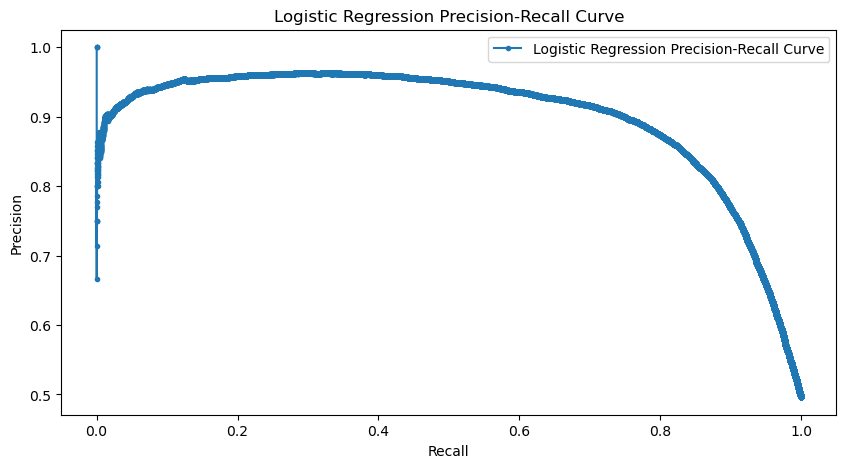

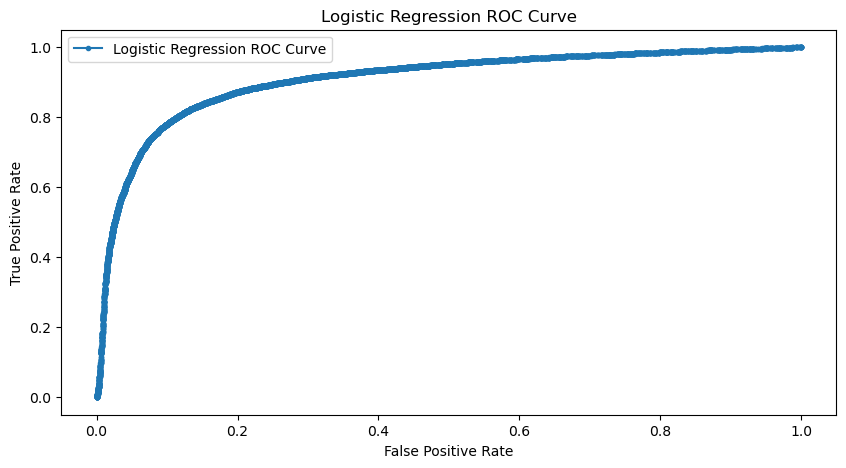


Evaluation Metrics for Random Forest on Validation Set:
Accuracy: 0.9381
F1 Score: 0.9379
Precision: 0.9334
Recall: 0.9424
Cohen's Kappa Score: 0.8761
Matthews Correlation Coefficient: 0.8762
ROC-AUC Score: 0.9837
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     19009
           1       0.93      0.94      0.94     18712

    accuracy                           0.94     37721
   macro avg       0.94      0.94      0.94     37721
weighted avg       0.94      0.94      0.94     37721

Confusion Matrix:
[[17750  1259]
 [ 1077 17635]]


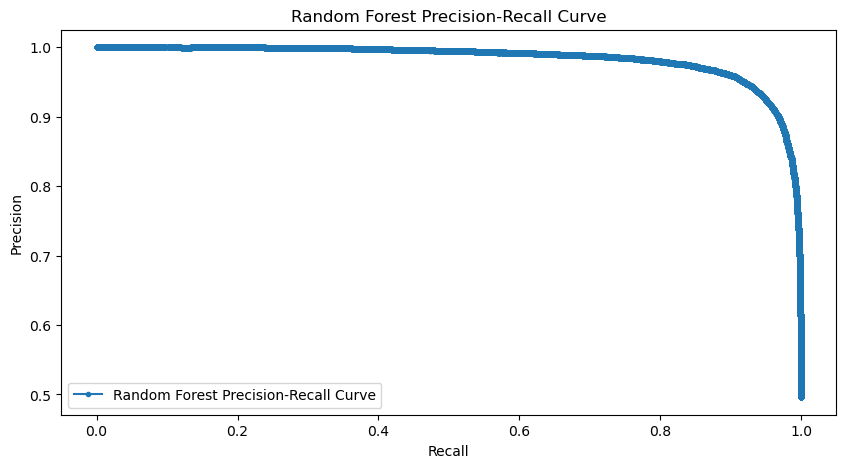

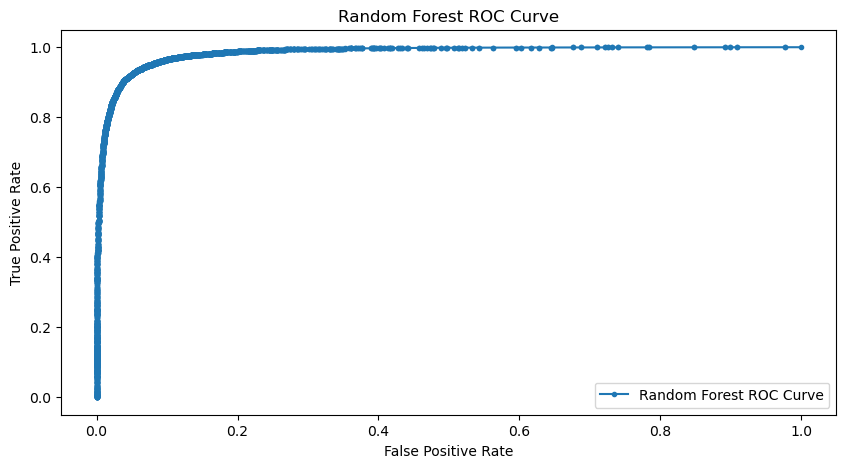


Evaluation Metrics for XGBoost on Validation Set:
Accuracy: 0.9617
F1 Score: 0.9613
Precision: 0.9645
Recall: 0.9580
Cohen's Kappa Score: 0.9234
Matthews Correlation Coefficient: 0.9234
ROC-AUC Score: 0.9929
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     19009
           1       0.96      0.96      0.96     18712

    accuracy                           0.96     37721
   macro avg       0.96      0.96      0.96     37721
weighted avg       0.96      0.96      0.96     37721

Confusion Matrix:
[[18350   659]
 [  785 17927]]


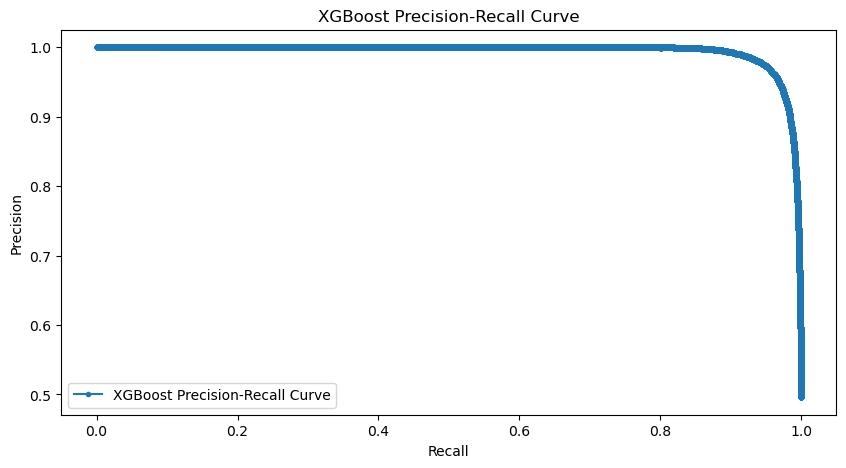

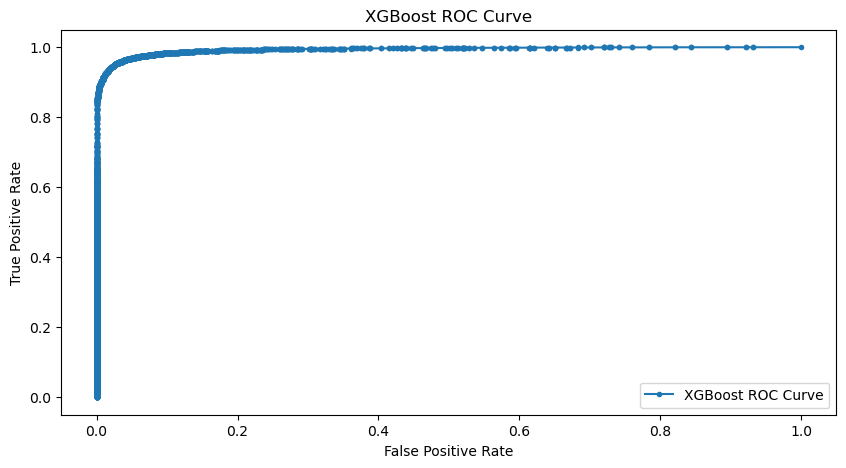


Evaluation Metrics for All Models:
                 Model  Accuracy  F1 Score  Precision    Recall     Kappa  \
0  Logistic Regression  0.841362  0.841366   0.834771  0.848065  0.682743   
1        Random Forest  0.938072  0.937882   0.933365  0.942443  0.876145   
2              XGBoost  0.961719  0.961285   0.964543  0.958048  0.923429   

        MCC   ROC-AUC  
0  0.682828  0.906886  
1  0.876186  0.983735  
2  0.923450  0.992916  


In [42]:
from skopt import BayesSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score,
                             cohen_kappa_score, matthews_corrcoef, roc_auc_score,
                             classification_report, confusion_matrix, precision_recall_curve, roc_curve)
import matplotlib.pyplot as plt
import pandas as pd

# Define models and parameter grids for hyperparameter tuning
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=500),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

param_grids = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
    'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [5, 10, 15]},
    'XGBoost': {'n_estimators': [100, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]}
}

# Dictionary to store the best estimators after tuning
best_estimators = {}

# Perform hyperparameter tuning with BayesSearchCV for each model
for model_name, model in models.items():
    print(f"\nTuning hyperparameters for {model_name}...")
    bayes_search = BayesSearchCV(
        estimator=model,
        search_spaces=param_grids[model_name],
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        n_iter=30,
        scoring='accuracy',
        random_state=42
    )
    bayes_search.fit(X_train_full, y_train_full)
    best_estimators[model_name] = bayes_search.best_estimator_
    print(f"Best parameters for {model_name}: {bayes_search.best_params_}")
    print(f"Best cross-validation accuracy for {model_name}: {bayes_search.best_score_:.4f}")

# Evaluate each tuned model on the validation set
evaluation_metrics = []

for model_name, model in best_estimators.items():
    # Predict validation set results
    y_val_preds = model.predict(X_val_full)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_val_full, y_val_preds)
    f1 = f1_score(y_val_full, y_val_preds)
    precision = precision_score(y_val_full, y_val_preds)
    recall = recall_score(y_val_full, y_val_preds)
    kappa = cohen_kappa_score(y_val_full, y_val_preds)
    mcc = matthews_corrcoef(y_val_full, y_val_preds)
    roc_auc = roc_auc_score(y_val_full, model.predict_proba(X_val_full)[:, 1])

    evaluation_metrics.append([model_name, accuracy, f1, precision, recall, kappa, mcc, roc_auc])

    # Print metrics for the model
    print(f"\nEvaluation Metrics for {model_name} on Validation Set:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Cohen's Kappa Score: {kappa:.4f}")
    print(f"Matthews Correlation Coefficient: {mcc:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")
    print(f"Classification Report:\n{classification_report(y_val_full, y_val_preds)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_val_full, y_val_preds)}")

    # Plot Precision-Recall Curve
    precision_vals, recall_vals, _ = precision_recall_curve(y_val_full, model.predict_proba(X_val_full)[:, 1])
    plt.figure(figsize=(10, 5))
    plt.plot(recall_vals, precision_vals, marker='.', label=f'{model_name} Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{model_name} Precision-Recall Curve')
    plt.legend()
    plt.show()

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_val_full, model.predict_proba(X_val_full)[:, 1])
    plt.figure(figsize=(10, 5))
    plt.plot(fpr, tpr, marker='.', label=f'{model_name} ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend()
    plt.show()

# Create DataFrame to compare evaluation metrics for all models
evaluation_df = pd.DataFrame(evaluation_metrics, columns=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall', 'Kappa', 'MCC', 'ROC-AUC'])
print("\nEvaluation Metrics for All Models:")
print(evaluation_df)

In [43]:
import lightgbm as lgb
print(lgb.__version__)

4.5.0


# Section XI: Ensemble Learning with Stacking

In [44]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix

# Define the base estimators for stacking
estimators = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')),
    ('lgb', LGBMClassifier(random_state=42))
]

# Define the stacking classifier with Logistic Regression as the final estimator
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(random_state=42))

# Since data is already preprocessed, use only the model step in the pipeline
stacking_pipeline = Pipeline(steps=[
    ('model', stacking_classifier)
])

# Fit the stacking pipeline on the training data
stacking_pipeline.fit(X_train_full, y_train_full)

# Make predictions on the validation set
stacking_val_pred = stacking_pipeline.predict(X_val_full)

# Calculate evaluation metrics for the stacking classifier
stacking_accuracy = accuracy_score(y_val_full, stacking_val_pred)
stacking_f1 = f1_score(y_val_full, stacking_val_pred)
stacking_precision = precision_score(y_val_full, stacking_val_pred)
stacking_recall = recall_score(y_val_full, stacking_val_pred)
stacking_roc_auc = roc_auc_score(y_val_full, stacking_val_pred)
stacking_conf_matrix = confusion_matrix(y_val_full, stacking_val_pred)

# Print the evaluation metrics for the stacking model
print("\nEvaluation Metrics for Stacking Model on Validation Set:")
print(f"Accuracy: {stacking_accuracy:.4f}")
print(f"F1 Score: {stacking_f1:.4f}")
print(f"Precision: {stacking_precision:.4f}")
print(f"Recall: {stacking_recall:.4f}")
print(f"ROC-AUC Score: {stacking_roc_auc:.4f}")
print(f"Confusion Matrix:\n{stacking_conf_matrix}")

[LightGBM] [Info] Number of positive: 44155, number of negative: 43858
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000905 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 88013, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501687 -> initscore=0.006749
[LightGBM] [Info] Start training from score 0.006749
[LightGBM] [Info] Number of positive: 35324, number of negative: 35086
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000904 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 70410, number of used features: 20
[LightGBM] [Info] [b

# Section X: Plot ROC Curve for Stacking Model

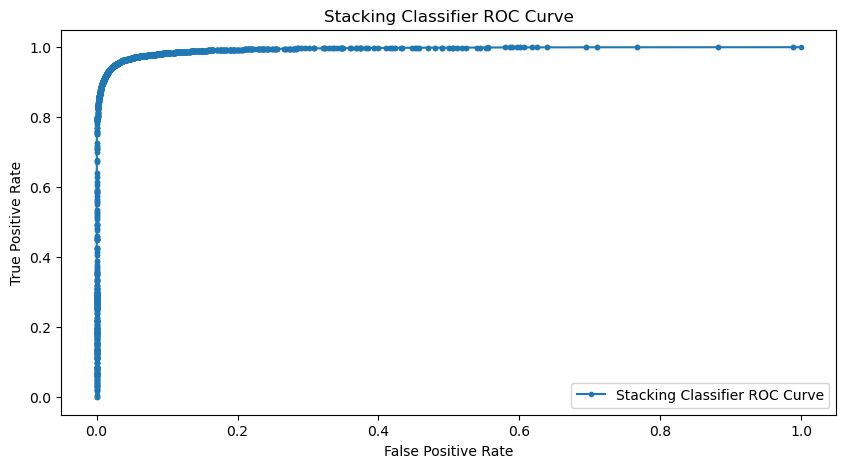

In [45]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Generate FPR and TPR for the stacking classifier
stacking_fpr, stacking_tpr, _ = roc_curve(y_val_full, stacking_pipeline.predict_proba(X_val_full)[:, 1])

# Plotting the ROC Curve
plt.figure(figsize=(10, 5))
plt.plot(stacking_fpr, stacking_tpr, marker='.', label='Stacking Classifier ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Stacking Classifier ROC Curve')
plt.legend()
plt.show()

# Section XI: Model Explainability

100%|===================| 37602/37721 [04:12<00:00]        

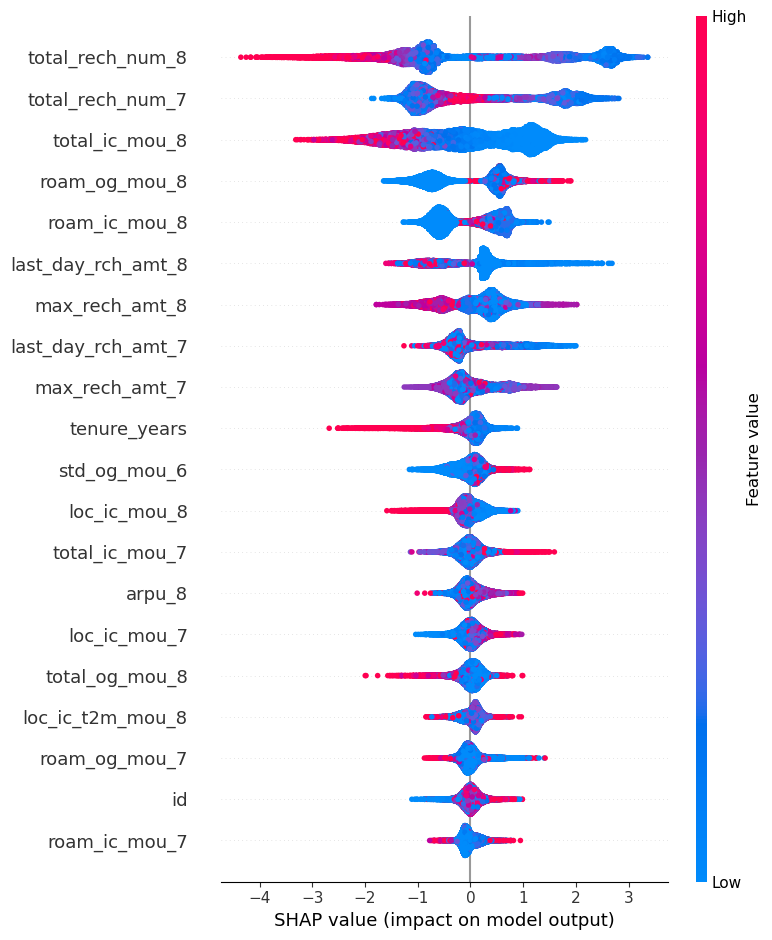

In [46]:
import shap
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Remove unnecessary preprocessing steps from the pipeline since data is already preprocessed
best_model_pipeline = Pipeline(steps=[
    ('model', best_estimators['XGBoost'])  # Directly use the best XGBoost model
])

# Fit the best XGBoost model on the training data
best_model_pipeline.fit(X_train_full, y_train_full)

# Setting up the SHAP explainer for XGBoost
# Note: Use the XGBoost model directly from the pipeline
explainer = shap.Explainer(best_estimators['XGBoost'], X_train_full)

# Calculating SHAP values for the validation set
shap_values = explainer(X_val_full)

# Summary plot of SHAP values for the validation set
shap.summary_plot(shap_values, X_val_full, show=False)
plt.show()

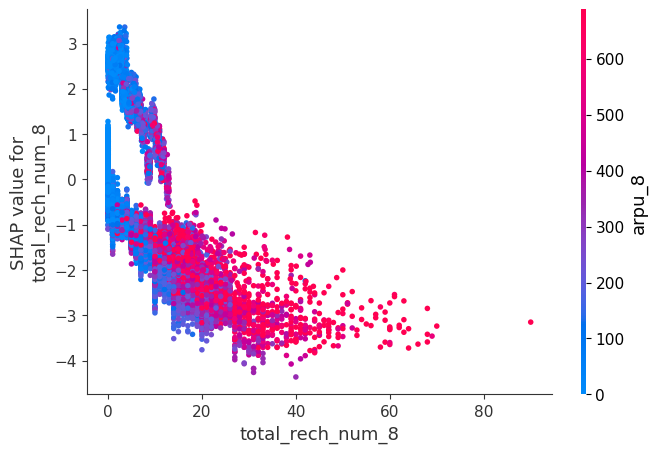

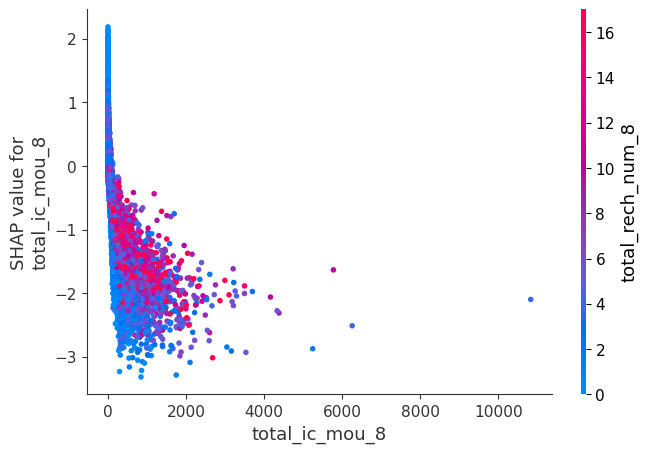

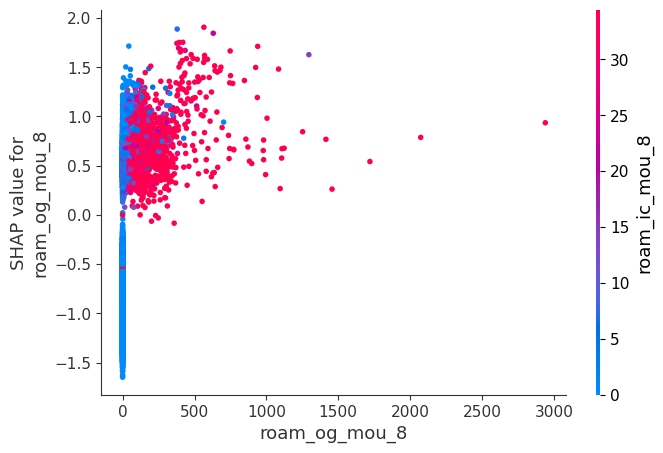

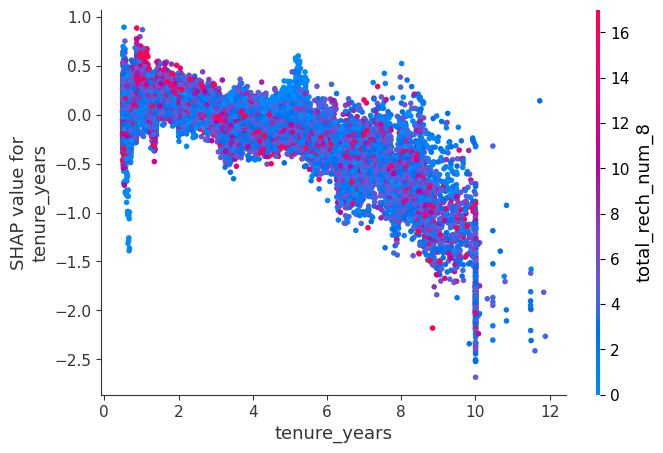

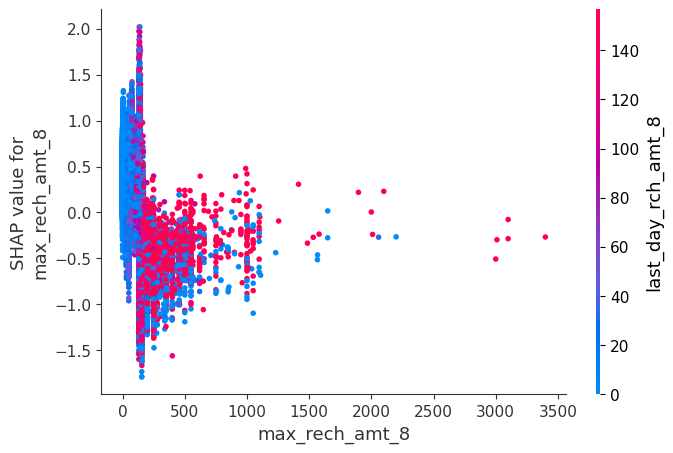

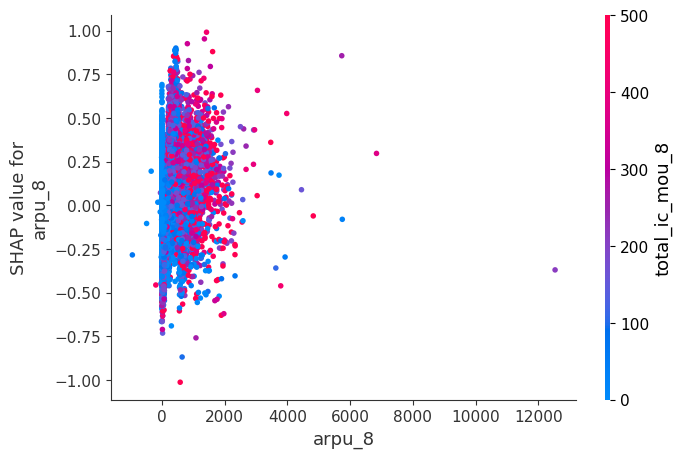

In [47]:
import shap

# Assuming shap_values is an Explanation object returned by shap.Explainer(...)
# Extract the SHAP values from the Explanation object
shap_values_array = shap_values.values  # This will extract the SHAP values as a numpy array

# Use the extracted SHAP values for dependence plotting
shap.dependence_plot('total_rech_num_8', shap_values_array, X_val_full)
shap.dependence_plot('total_ic_mou_8', shap_values_array, X_val_full, interaction_index='total_rech_num_8')
shap.dependence_plot('roam_og_mou_8', shap_values_array, X_val_full, interaction_index='roam_ic_mou_8')
shap.dependence_plot('tenure_years', shap_values_array, X_val_full, interaction_index='total_rech_num_8')
shap.dependence_plot('max_rech_amt_8', shap_values_array, X_val_full, interaction_index='last_day_rch_amt_8')
shap.dependence_plot('arpu_8', shap_values_array, X_val_full, interaction_index='total_ic_mou_8')

# Section XII: Section XII: Addressing Overfitting and Underfitting, incorporating the strategies discussed, including regularization, cross-validation, early stopping, ensemble averaging, and learning curve analysis.


Cross-Validation with Best Model Pipeline:
Cross-Validation Scores: [0.96341533 0.96085894 0.96165426 0.96494717 0.95960686]
Mean CV Accuracy: 0.9621

Training with Manual Early Stopping for XGBoost:
Early stopping triggered at iteration: 118
Best iteration after early stopping: 108

Re-training XGBoost Model with Tuning for Regularization:

Applying PCA for Dimensionality Reduction:

Training Best Model with PCA Transformed Data:
Validation Accuracy after PCA: 0.5328

Training Voting Ensemble for Generalization:
[LightGBM] [Info] Number of positive: 44155, number of negative: 43858
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000996 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 88013, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501687

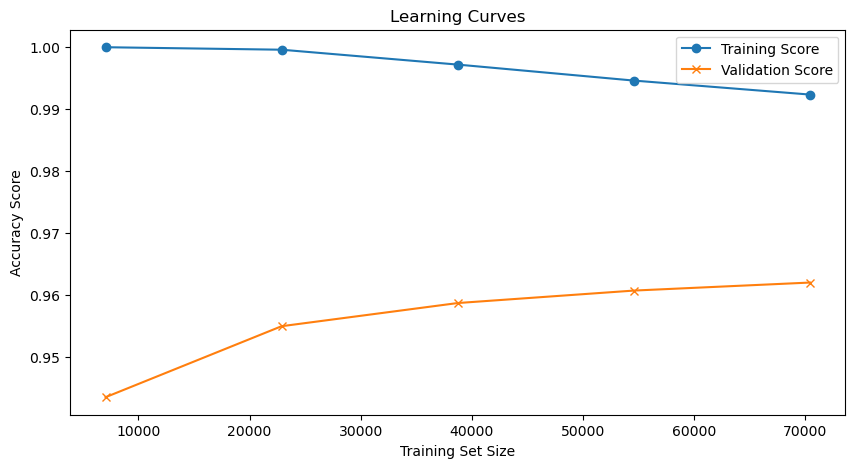


Summary:
1. Cross-validation applied to evaluate model generalization.
2. Manual early stopping used to prevent overfitting with XGBoost.
3. Subsampling, colsample_bytree, and learning rate tuning applied for regularization.
4. PCA applied to reduce dimensionality and simplify the model.
5. Voting ensemble used to combine different models for better generalization.
6. Learning curve generated to diagnose any signs of overfitting or underfitting.


In [48]:
import numpy as np
import pandas as pd
import shap
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import cross_val_score, learning_curve, train_test_split
from xgboost import XGBClassifier
import lightgbm as lgb
import matplotlib.pyplot as plt

# Assuming X_train_full, y_train_full, X_val_full, y_val_full are defined from previous sections

# Step 1: Setting Up Best Model Pipeline from Bayes Search
best_model_pipeline = Pipeline(steps=[
    ('model', bayes_search.best_estimator_)  # Use the best model obtained from Bayesian search
])

# Fit the Best Model Pipeline on Training Data
best_model_pipeline.fit(X_train_full, y_train_full)

# Step 2: Cross-Validation for Performance Evaluation
print("\nCross-Validation with Best Model Pipeline:")
cv_scores = cross_val_score(best_model_pipeline, X_train_full, y_train_full, cv=5, scoring='accuracy')
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Accuracy: {cv_scores.mean():.4f}')

# Step 3: Manual Early Stopping for XGBoost
print("\nTraining with Manual Early Stopping for XGBoost:")
best_xgb_params = best_model_pipeline.named_steps['model'].get_params()
best_xgb_model = XGBClassifier(**best_xgb_params)

n_rounds = 500  # maximum number of iterations
early_stopping_rounds = 10
min_delta = 0.001
best_loss = np.inf
best_iteration = 0

for i in range(1, n_rounds + 1):
    best_xgb_model.set_params(n_estimators=i)
    best_xgb_model.fit(X_train_full, y_train_full, verbose=False)

    y_val_pred_proba = best_xgb_model.predict_proba(X_val_full)
    current_loss = log_loss(y_val_full, y_val_pred_proba)

    # Check if the loss improved
    if current_loss < best_loss - min_delta:
        best_loss = current_loss
        best_iteration = i
    elif i - best_iteration >= early_stopping_rounds:
        print(f"Early stopping triggered at iteration: {i}")
        break

# Final Model Fitting with Best Number of Estimators
best_xgb_model.set_params(n_estimators=best_iteration)
best_xgb_model.fit(X_train_full, y_train_full)
print(f"Best iteration after early stopping: {best_iteration}")

# Step 4: Tuning Subsample, Colsample_bytree, and Learning Rate for XGBoost
print("\nRe-training XGBoost Model with Tuning for Regularization:")
best_xgb_model.set_params(subsample=0.8, colsample_bytree=0.8, learning_rate=0.01)
best_xgb_model.fit(X_train_full, y_train_full)

# Step 5: Applying Dimensionality Reduction using PCA
print("\nApplying PCA for Dimensionality Reduction:")
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_full)
X_val_pca = pca.transform(X_val_full)

# Fit Best Model Again with Reduced Dimensionality Data
print("\nTraining Best Model with PCA Transformed Data:")
best_model_pipeline.fit(X_train_pca, y_train_full)
y_val_pred_pca = best_model_pipeline.predict(X_val_pca)
pca_accuracy = accuracy_score(y_val_full, y_val_pred_pca)
print(f'Validation Accuracy after PCA: {pca_accuracy:.4f}')

# Step 6: Voting Ensemble to Reduce Overfitting
print("\nTraining Voting Ensemble for Generalization:")
voting_ensemble = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', XGBClassifier(random_state=42)),
    ('lgb', lgb.LGBMClassifier(random_state=42))
], voting='soft')

voting_ensemble.fit(X_train_full, y_train_full)
y_val_pred_ensemble = voting_ensemble.predict(X_val_full)
ensemble_accuracy = accuracy_score(y_val_full, y_val_pred_ensemble)
print(f'Voting Ensemble Validation Accuracy: {ensemble_accuracy:.4f}')

# Step 7: Learning Curve Analysis to Diagnose Overfitting or Underfitting
print("\nGenerating Learning Curve for Best Model Pipeline:")
train_sizes, train_scores, val_scores = learning_curve(best_model_pipeline, X_train_full, y_train_full, 
                                                       cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 5))

plt.figure(figsize=(10, 5))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score', marker='o')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation Score', marker='x')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curves')
plt.legend()
plt.show()

# Step 8: Summary of Steps Taken to Address Overfitting and Underfitting
print("\nSummary:")
print("1. Cross-validation applied to evaluate model generalization.")
print("2. Manual early stopping used to prevent overfitting with XGBoost.")
print("3. Subsampling, colsample_bytree, and learning rate tuning applied for regularization.")
print("4. PCA applied to reduce dimensionality and simplify the model.")
print("5. Voting ensemble used to combine different models for better generalization.")
print("6. Learning curve generated to diagnose any signs of overfitting or underfitting.")


# Section XIII: Final Model Training, Testing, and Saving

In [49]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder

# Step 1: Train the Best Model on the Full Training Data
print("\nTraining Best Model Pipeline on Full Training Data:")
best_model_pipeline.fit(X_train_full, y_train_full)

# Step 2: Recreate the OneHotEncoder and Fit It Using Training Data
print("\nRecreating Encoder for Consistency in Test Data Transformation:")

# Identify the categorical columns still available in the training data
categorical_cols_train_available = X_train_full.select_dtypes(include=['object']).columns.tolist()

# Recreate and fit the encoder using the available categorical columns from the training data
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoder.fit(X_train_full[categorical_cols_train_available])

# Step 3: Apply Consistent Preprocessing to Test Data
print("\nApplying Consistent Preprocessing to Test Data:")

# Select only those columns in the test set that are also in the training set
columns_train = X_train_full.columns
X_test = test_data[columns_train.intersection(test_data.columns)].copy()

# Encoding Categorical Features of Test Data
print("\nEncoding Categorical Features of Test Data:")
if all(col in X_test.columns for col in categorical_cols_train_available):
    # Encode using the same encoder fitted on the training data
    encoded_features_test = pd.DataFrame(encoder.transform(X_test[categorical_cols_train_available]))
    encoded_features_test.columns = encoder.get_feature_names_out(categorical_cols_train_available)
    
    # Drop Original Categorical Columns from Test Data and Concatenate Encoded Features
    X_test.drop(categorical_cols_train_available, axis=1, inplace=True)
    X_test = pd.concat([X_test.reset_index(drop=True), encoded_features_test.reset_index(drop=True)], axis=1)
else:
    missing_cols = [col for col in categorical_cols_train_available if col not in X_test.columns]
    print(f"Warning: The following columns are missing in the test data and will be skipped: {missing_cols}")
    X_test = test_data.copy()

# Step 4: Align Features Between Training and Test Data
print("\nAligning Features Between Training and Test Data:")
# Ensure that the columns in the test set match those in the training set
missing_cols_in_test = set(columns_train) - set(X_test.columns)
extra_cols_in_test = set(X_test.columns) - set(columns_train)

# Add missing columns as zeros (or use mean/appropriate value if necessary)
for col in missing_cols_in_test:
    X_test[col] = 0  # You could use other strategies like X_train_full[col].mean()

# Drop extra columns that are not in training set
X_test.drop(columns=extra_cols_in_test, inplace=True)

# Reorder columns to match the training set
X_test = X_test[columns_train]

# Step 5: Apply Feature Selection (RFE) Only Once
print("\nFitting RFE and Applying Feature Selection on Training Data:")
# Fit RFE on the training data
rfe.fit(X_train_full, y_train_full)
rfe_support_mask = rfe.get_support()

# Apply the mask to training data to create a reduced version
X_train_selected = X_train_full.loc[:, rfe_support_mask]

# Apply the mask to the test data to select the same features
X_test_selected = X_test.loc[:, rfe_support_mask]

# Step 6: Make Predictions on the Test Set
print("\nMaking Predictions on Test Data:")
y_test_pred = best_model_pipeline.predict(X_test_selected)
y_test_pred_proba = best_model_pipeline.predict_proba(X_test_selected)[:, 1]

# Step 7: Evaluate the Model Performance on the Test Set
print("\nEvaluating Test Set Performance:")
if 'churn_probability' in test_data.columns:
    accuracy_test = accuracy_score(test_data['churn_probability'], y_test_pred)
    roc_auc_test = roc_auc_score(test_data['churn_probability'], y_test_pred_proba)
    print(f'Test Set Accuracy: {accuracy_test:.4f}')
    print(f'Test Set ROC-AUC Score: {roc_auc_test:.4f}')
else:
    print("The 'churn_probability' target column is missing in the test data for evaluation.")

# Step 8: Saving the Final Trained Model
print("\nSaving the Final Model to File:")
joblib.dump(best_model_pipeline, 'final_model.pkl')
print("Model saved as 'final_model.pkl'")



Training Best Model Pipeline on Full Training Data:

Recreating Encoder for Consistency in Test Data Transformation:

Applying Consistent Preprocessing to Test Data:

Encoding Categorical Features of Test Data:

Aligning Features Between Training and Test Data:

Fitting RFE and Applying Feature Selection on Training Data:

Making Predictions on Test Data:

Evaluating Test Set Performance:
Test Set Accuracy: 0.9533
Test Set ROC-AUC Score: 0.9847

Saving the Final Model to File:
Model saved as 'final_model.pkl'


# Section XIV: Generate submission file

In [50]:
submission = pd.DataFrame({'Id': test_data.index, 'Churn Probability': y_test_pred})
submission.to_csv('submission_copy.csv', index=False)
print("Submission file generated successfully!")

Submission file generated successfully!
